# Part a : Ordinary Least Square (OLS) for the Runge function

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import os # for saving figures
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt
from numpy.linalg import inv
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import statistics
from sklearn.utils import resample


In [2]:
# Setting seed for reproducibility
np.random.seed(42)
n = 200

# Creating a grid of n=200 points drawn from the random distribution
x = np.random.uniform(-1, 1, n)

# Setting up Runge's function, 1 normal and 1 with added noise
y = 1.0 / (1 + 25 * x**2)
y_noise = 1.0 / (1 + 25 * x**2)+ np.random.normal(0, 0.1, x.shape)

# Calculating sample statistics
x_mean = np.mean(x)
x_variance = np.std(x, ddof=1) #sample variance

#Scaling x values for a visual comparison
x_st = (x - x_mean) / x_variance

# Global parameters for all figures (up to heatmap)

In [3]:
plt.rcParams['font.size'] = 30  # Set the global font size
plt.rcParams['legend.fontsize'] = 'small' 
plt.rcParams['legend.loc'] = 'upper right' 

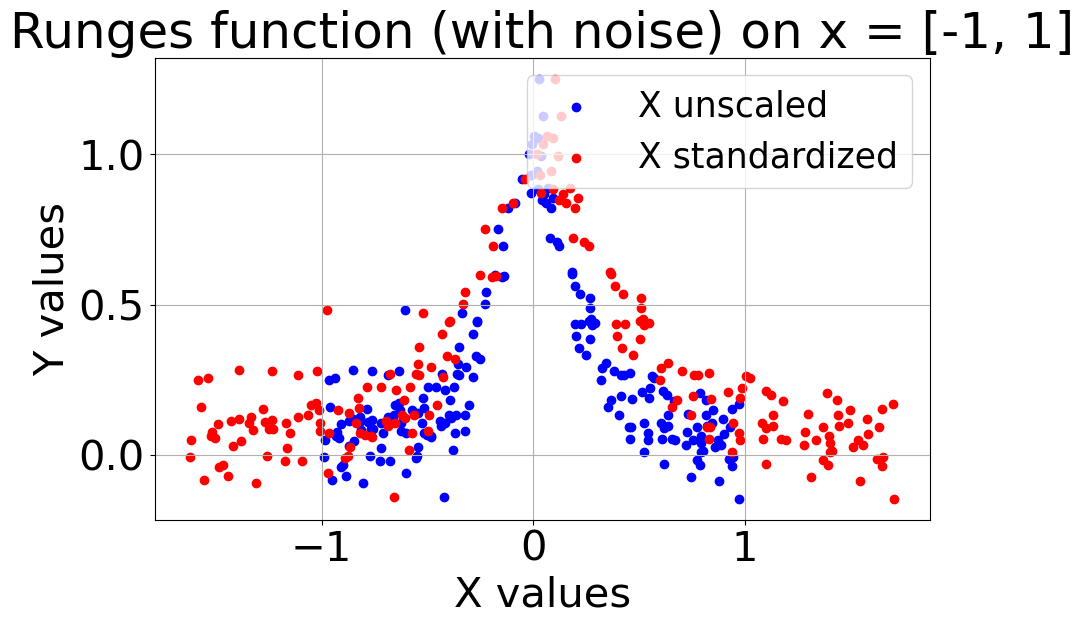

In [4]:
# Setting up and plotting the original and standardized datapoints
plt.figure(figsize=(10, 6))  
plt.title("Runges function (with noise) on x = [-1, 1]")
plt.scatter(x, y_noise, marker='o', linestyle='-', color='b', label='X unscaled')
plt.scatter(x_st, y_noise, marker='o', linestyle='-', color='r', label='X standardized')

plt.xlabel('X values')
plt.ylabel('Y values')

plt.legend()
plt.grid()
# Save the plot
plt.savefig(os.path.join('../Fig', 'sample data.png'))  # Specify file name and format

plt.show()

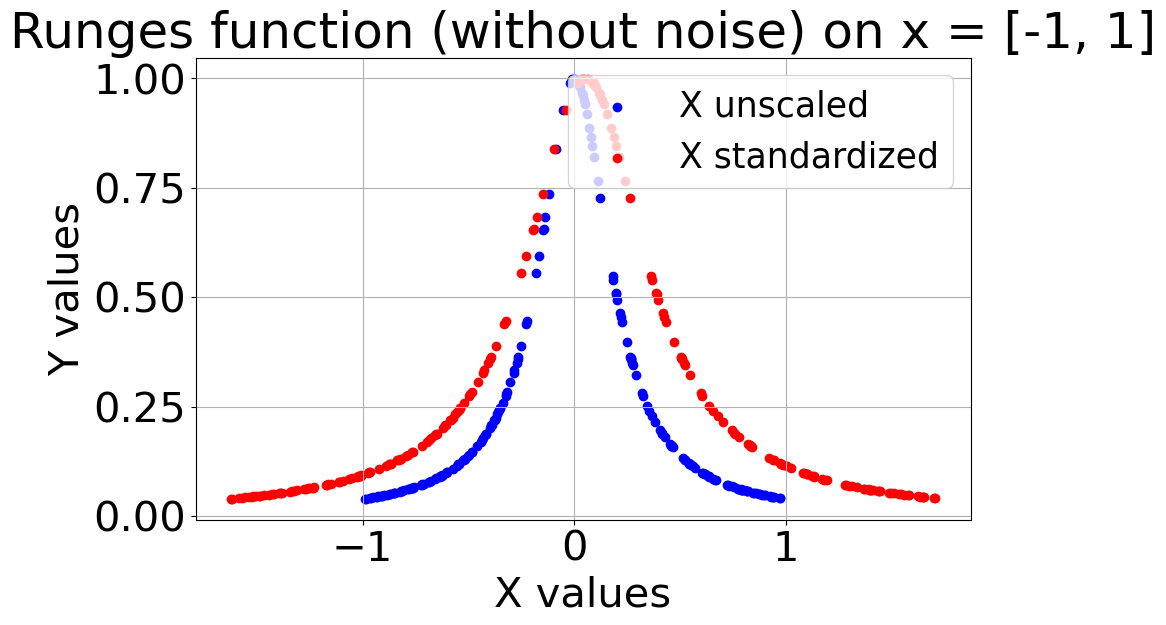

In [5]:
# Setting up and plotting the original and standardized datapoints
plt.figure(figsize=(10, 6))  
plt.title("Runges function (without noise) on x = [-1, 1]")
plt.scatter(x, y, marker='o', linestyle='-', color='b', label='X unscaled')
plt.scatter(x_st, y, marker='o', linestyle='-', color='r', label='X standardized')

plt.xlabel('X values')
plt.ylabel('Y values')

plt.legend()
plt.grid()

# Save the plot
plt.savefig(os.path.join('../Fig', 'sample data.png'))  # Specify file name and format

plt.show()

# Data split into train and test

In [6]:
# Now we split the dataset for training and testing (using the standardized x values) and noisy Runge
X_train, X_test, y_train_noise, y_test_noise = train_test_split(x_st, y_noise, test_size=0.2, random_state = 42)

# Here we do the same for the data without noise
_, _, y_train_clean, y_test_clean = train_test_split(x_st, y, test_size=0.2, random_state=42)

# Now we can use the same X-sets with different y-sets (with and without noise)

# Define custom functions 

In [7]:
def polynomial_features(x, p):
    """"A function manually implementing PolynomialFeatures."""
    n = len(x)
    X = np.zeros((n, p + 1))
    X[:, 0] = 1
    for i in range(1, p + 1):
        X[:, i] = x**i
        
    return X

In [8]:
def OLS_parameters(X, y):
    """"A function estimating the parameters using the analytical solution for OLS."""
    xT = X.T # transpose matrix x
    xTx_inv = inv(np.matmul(xT, X)) 
    xTy = np.matmul(xT, y)
    
    return np.matmul(xTx_inv, xTy)

In [9]:
def range_of_pole(start, finish, y_train, y_test):
    """"A function performing individual OLS estimations on a range of polynomials using PolynomialFeatures."""

    # Setting up empty matrices for metrics
    mse_np = np.zeros((finish - start + 1 , 3))
    r_2 = np.zeros((finish - start + 1 , 3))

    # For storing theta values
    theta = []

    n = 0

    for i in range(start, finish + 1):
        
        X_train_poly = polynomial_features(X_train, i)
        X_test_poly = polynomial_features(X_test, i)

        # Fitting the model
        poly_fit =  OLS_parameters(X_train_poly, y_train)

        # Storing the degree of polynomials and the theta-vector
        theta.append([i, poly_fit]) 
        
        # Using the estimated thetas to predict y values on train and test data
        y_predict_train = np.matmul(X_train_poly, poly_fit)
        y_predict_test = np.matmul(X_test_poly, poly_fit)

        # MSE
        mse_train = mean_squared_error(y_train,y_predict_train)
        mse_test = mean_squared_error(y_test,y_predict_test)
        mse_np[n] = [i, mse_train, mse_test]

        # R^2
        r2_traint= r2_score(y_train,y_predict_train)
        r2_test = r2_score(y_test,y_predict_test)
        r_2[n] = [i,r2_traint,r2_test]

        n += 1
        
    return mse_np, r_2, theta



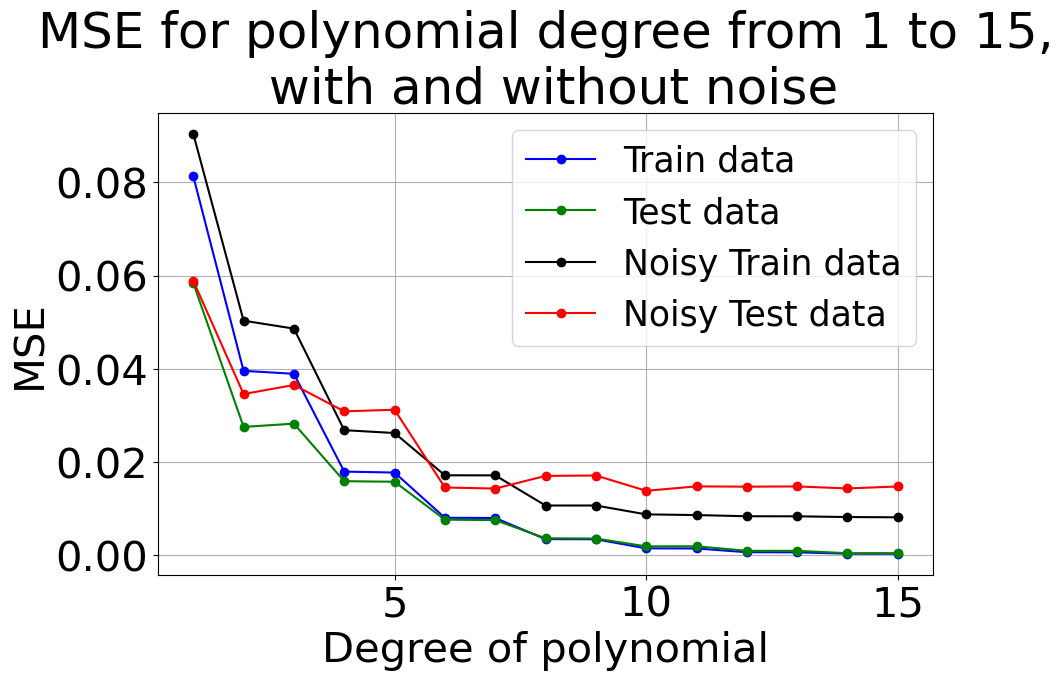

In [10]:
mse, r2, theta = range_of_pole(1, 15, y_train_clean, y_test_clean)
mse_noise, r2_noise, theta_noise = range_of_pole(1, 15, y_train_noise, y_test_noise)


# MSE plot
x_scale_mse = mse[:, 0]  # Selects all rows, 0th column (x-coordinates)
y_train_mse = mse[:, 1] 
y_test_mse = mse[:, 2]

# MSE noisy plot
x_scale_mse_noise = mse_noise[:, 0]  
y_train_mse_noise = mse_noise[:, 1] 
y_test_mse_noise = mse_noise[:, 2]

plt.figure(figsize=(10, 6))  
plt.plot(x_scale_mse, y_train_mse, marker='o', linestyle='-', color='blue', label = "Train data")
plt.plot(x_scale_mse, y_test_mse, marker='o', linestyle='-', color='green', label = "Test data")
plt.plot(x_scale_mse_noise, y_train_mse_noise, marker='o', linestyle='-', color='black', label = "Noisy Train data")
plt.plot(x_scale_mse_noise, y_test_mse_noise, marker='o', linestyle='-', color='red', label = "Noisy Test data")
plt.xlabel("Degree of polynomial")
plt.ylabel("MSE")
plt.title("MSE for polynomial degree from 1 to 15,\n with and without noise")
plt.grid()
plt.legend()

# Save the plot
plt.savefig(os.path.join('../Fig', 'OLS MSE.png'))  # Specify file name and format
plt.show()

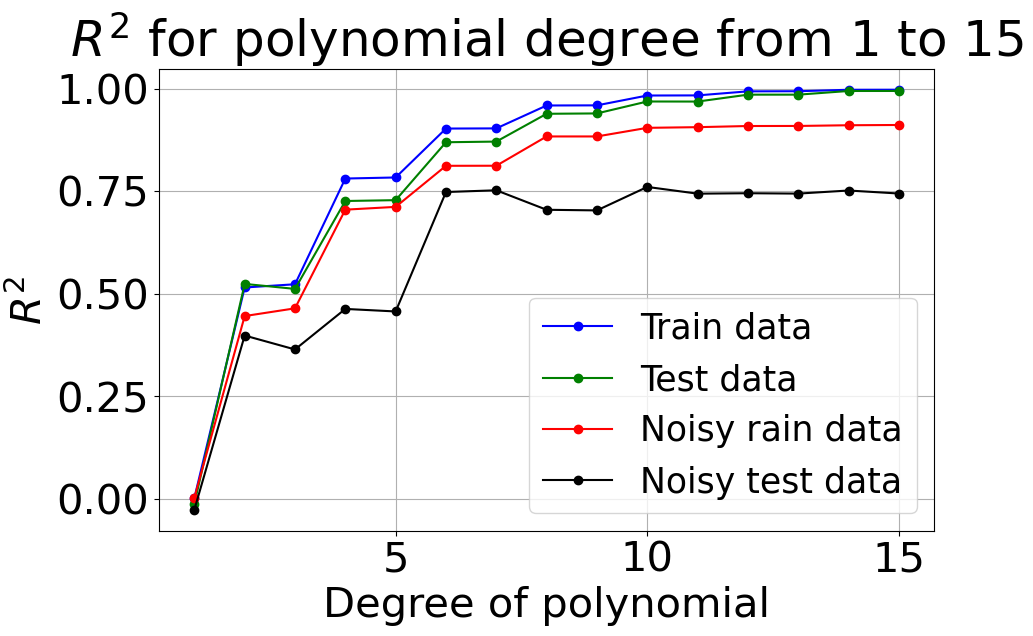

In [11]:
# R^2 plot

x_scale_r2 = r2[:, 0]  # Selects all rows, 0th column (x-coordinates)
y_train_r2 = r2[:, 1] 
y_test_r2 = r2[:, 2]

# R^2 noisy plot
x_scale_r2_noise = r2_noise[:, 0] 
y_train_r2_noise = r2_noise[:, 1] 
y_test_r2_noise = r2_noise[:, 2]

plt.figure(figsize=(10, 6))  
plt.plot(x_scale_r2, y_train_r2, marker='o', linestyle='-', color='blue', label = "Train data")
plt.plot(x_scale_r2, y_test_r2, marker='o', linestyle='-', color='green', label = "Test data")
plt.plot(x_scale_r2_noise, y_train_r2_noise, marker='o', linestyle='-', color='red', label = "Noisy rain data")
plt.plot(x_scale_r2_noise, y_test_r2_noise, marker='o', linestyle='-', color='black', label = "Noisy test data")
plt.xlabel("Degree of polynomial")
plt.ylabel("$R^2$")
plt.title("$R^2$ for polynomial degree from 1 to 15")
plt.grid()
plt.legend(loc='lower right')
#plt.legend()

# Save the plot
plt.savefig(os.path.join('../Fig', 'OLS R^2.png'))  # Specify file name and format
plt.show()

 <font color='red'>
<div style="background-color: #f0f0f0; border: 1px solid #d3d3d3; padding: 10px; border-radius: 5px;">


Plot also the parameters  \theta as you increase the order of the polynomial. Comment your results.

???

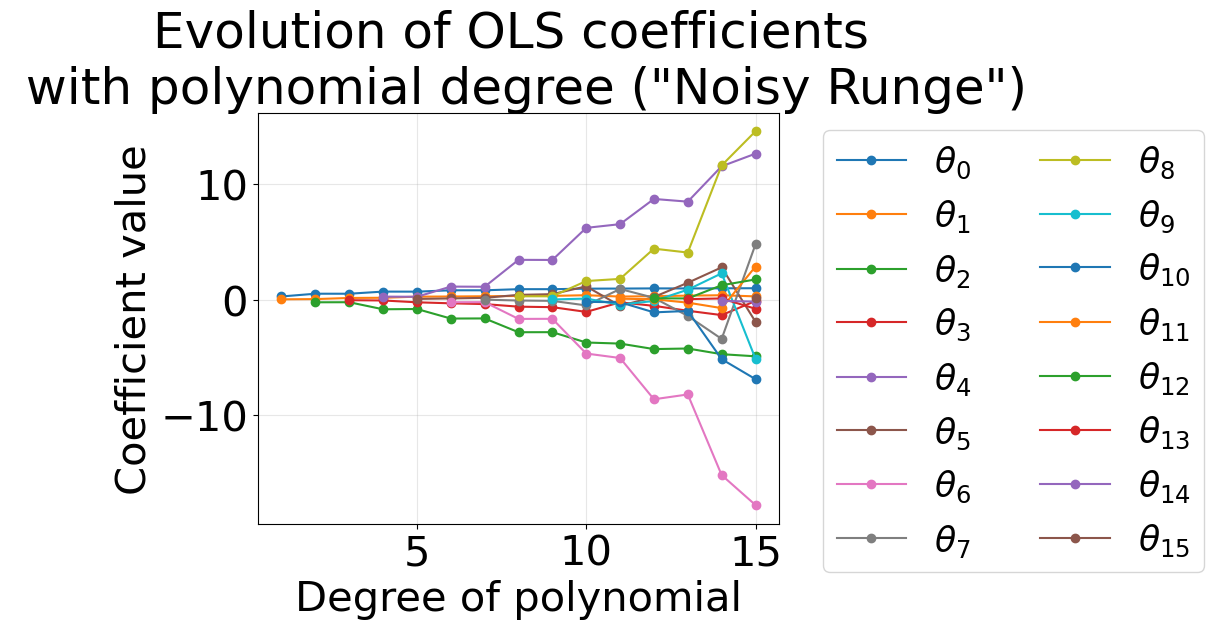

In [12]:
# Setting up the theta plot/ coefficient evolution. Now we choose only the noisy Runge function
plt.figure(figsize=(12, 7))

# Setting upper bound
max_degree = 15

# For each coefficient index
for coef_index in range(int(max_degree) + 1):

    # Initializing empty list for storing values
    degrees = []
    coef_values = []
    
    # Going through each polynomial degree
    for degree, theta_vector in theta_noise:

        # Checking dimensions of current theta
        if coef_index <= degree:
            degrees.append(degree)
            coef_values.append(theta_vector[coef_index])
    
    # Now we have all values for plotting each theta vector with corresponding polynomial degree
    if coef_values:
        plt.plot(degrees, coef_values, marker='o', 
                label=f'$θ_{{{coef_index}}}$')

plt.xlabel("Degree of polynomial")
plt.ylabel("Coefficient value")
plt.title('Evolution of OLS coefficients \n with polynomial degree ("Noisy Runge")')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', ncol=2)
plt.grid(True, alpha=0.3)
plt.tight_layout()

# Save the plot
plt.savefig(os.path.join('../Fig', 'OLS_theta_evolution.png'))
plt.show()

In [13]:
print(theta[4])

[5, array([ 0.67812399,  0.16748472, -0.82546388, -0.15221808,  0.23821572,
        0.0297836 ])]


# Define a list of coefficients for polynomials of different degrees
polynomials = theta
    

# Function to generate and plot polynomial of given degree and coefficients
def plot_polynomial(degree, coefficients):
    # Create a range of x values
    x_plot = np.linspace(-10, 10, 400)

    # Calculate corresponding y values using the polynomial coefficients
    y = np.polyval(coefficients, x_plot)
    
    # Plot the polynomial
    plt.plot(x_plot, y_noise, label=f'Polynomial Degree {degree}')

# Create the plot
plt.figure(figsize=(12, 8))

# Loop through your coefficients
for degree, coefficients in polynomials:
    plot_polynomial(degree, coefficients)

# Add title and labels
plt.title('Polynomials of Degrees 1-15, OLS', fontsize = 25)
plt.xlabel('x', fontsize = 22)
plt.ylabel('y', fontsize = 22)
plt.axhline(0, color='black', linewidth=0.5, ls='--')
plt.axvline(0, color='black', linewidth=0.5, ls='--')
plt.grid()
plt.legend()
plt.xlim(-2, 4)  # Set x-axis limits
plt.ylim(-2, 2)  # Set y-axis limits
# Save the plot
plt.savefig(os.path.join('../Fig', 'theta OLS.png'))  # Specify file name and format
plt.show()


# Part b: Adding Ridge regression for the Runge function

In [14]:
def Ridge_parameters(X, y, l = 0.01):
    """"Using the analytical solution of parameter estimation with Ridge regression."""

    # Retrieving the dimensions of X
    n = len(X.T @ X)
    I = np.identity(n)
    return np.linalg.inv(X.T @ X + 2 * l * I ) @ X.T @ y

In [15]:
# Setting up for grid search
degrees_ridge = np.arange(1, 16) # The number of degrees 
lambdas_ridge = np.arange(0, 8)  # lambda parameter

rows = len(lambdas_ridge)
cols = len(degrees_ridge)

MSE_train = np.zeros((rows, cols))
MSE_test = np.zeros((rows, cols))

for i in range(rows):
    for j in range(cols):  
        X_train_poly = polynomial_features(X_train, j + 1)
        X_test_poly = polynomial_features(X_test, j + 1)        
        
        # Estimating the parameters using Ridge regression
        beta = Ridge_parameters(X_train_poly, y_train_noise, lambdas_ridge[i])
        
        # Calculate MSE
        MSE_train[i, j] = mean_squared_error(y_train_noise, X_train_poly @ beta)
        MSE_test[i, j] = mean_squared_error(y_test_noise, X_test_poly @ beta)


# Set text size for heat map

In [16]:
plt.rcParams['font.size'] = 12  # Set the global font size
fontsize = 30

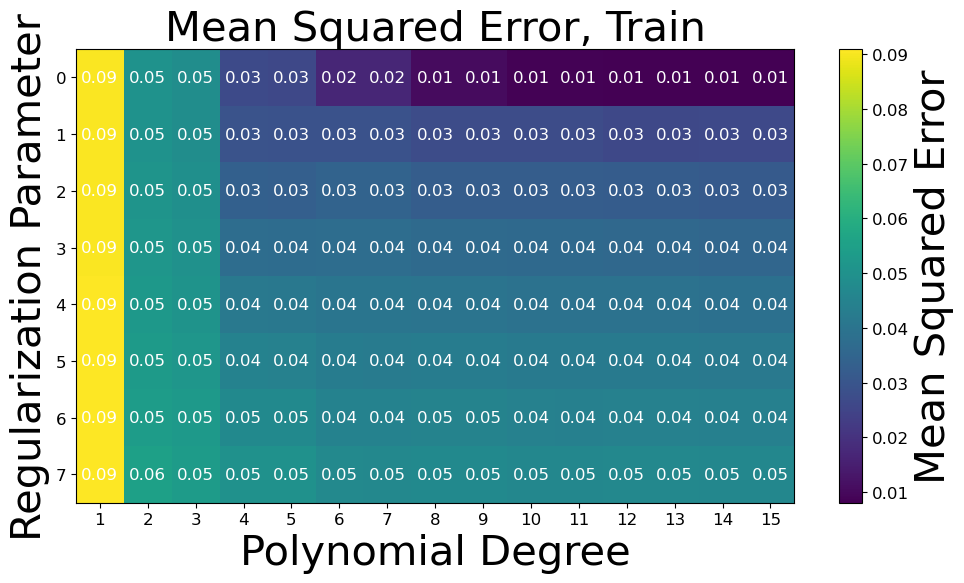

In [17]:
# Plotting the train results as a heatmap
fig, ax = plt.subplots(figsize=(10, 6))
im = ax.imshow(MSE_train, aspect='auto', cmap='viridis')  # Use a colormap for better visualization

# Show all ticks and label them with the respective list entries
ax.set_xticks(range(cols))
ax.set_xticklabels(degrees_ridge)
ax.set_yticks(range(rows))
#ax.set_yticklabels([f'{l:.1e}' for l in x_lambda])  # Scientific notation for lambda values

# Loop over data dimensions and create text annotations.
for i in range(rows):
    for j in range(cols):
        text = ax.text(j, i, f"{MSE_train[i, j]:.2f}",
                       ha="center", va="center", color="white")  # Adjust text color for visibility

# Adding color bar
cbar = fig.colorbar(im, ax=ax)
cbar.set_label('Mean Squared Error', fontsize=fontsize)

ax.set_title("Mean Squared Error, Train", fontsize=fontsize)
ax.set_xlabel("Polynomial Degree", fontsize=fontsize)
ax.set_ylabel("Regularization Parameter", fontsize=fontsize)
plt.tight_layout()

# Save the plot
plt.savefig(os.path.join('../Fig', 'MSE_Ridge_Train.png'))  # Specify file name and format
plt.show()

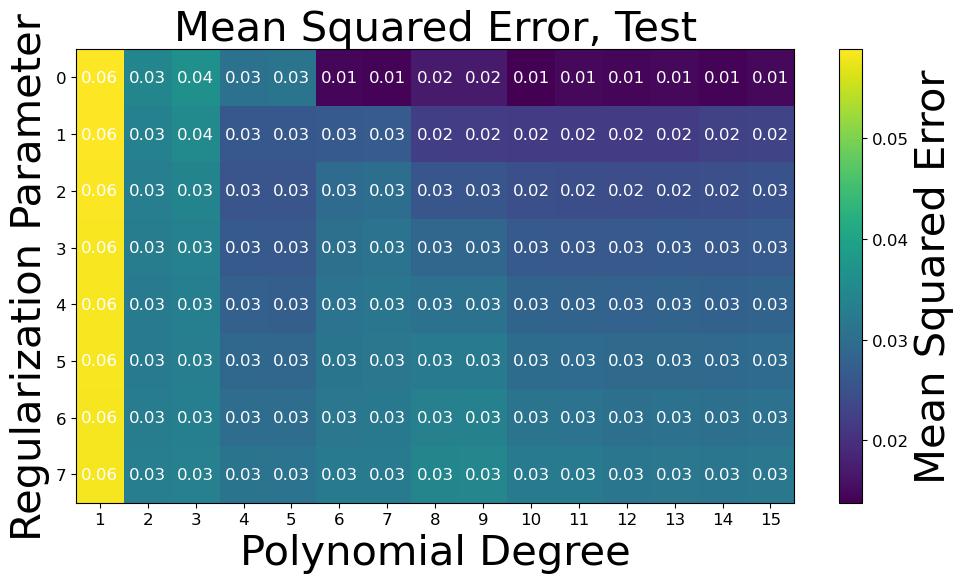

In [18]:
# Plotting the train results as a heatmap
fig, ax = plt.subplots(figsize=(10, 6))
im = ax.imshow(MSE_test, aspect='auto', cmap='viridis')  # Use a colormap for better visualization

# Show all ticks and label them with the respective list entries
ax.set_xticks(range(cols))
ax.set_xticklabels(degrees_ridge)
ax.set_yticks(range(rows))
#ax.set_yticklabels([f'{l:.1e}' for l in x_lambda])  # Scientific notation for lambda values

# Loop over data dimensions and create text annotations.
for i in range(rows):
    for j in range(cols):
        text = ax.text(j, i, f"{MSE_test[i, j]:.2f}",
                       ha="center", va="center", color="white")  # Adjust text color for visibility

# Adding color bar
cbar = fig.colorbar(im, ax=ax)
cbar.set_label('Mean Squared Error', fontsize=fontsize)

ax.set_title("Mean Squared Error, Test", fontsize=fontsize)
ax.set_xlabel("Polynomial Degree", fontsize=fontsize)
ax.set_ylabel("Regularization Parameter", fontsize=fontsize)
plt.tight_layout()

plt.savefig(os.path.join('../Fig', 'MSE_Ridge_Test.png'))  # Specify file name and format
plt.show()

In [19]:
## not for report_ for easier analysis made by AI

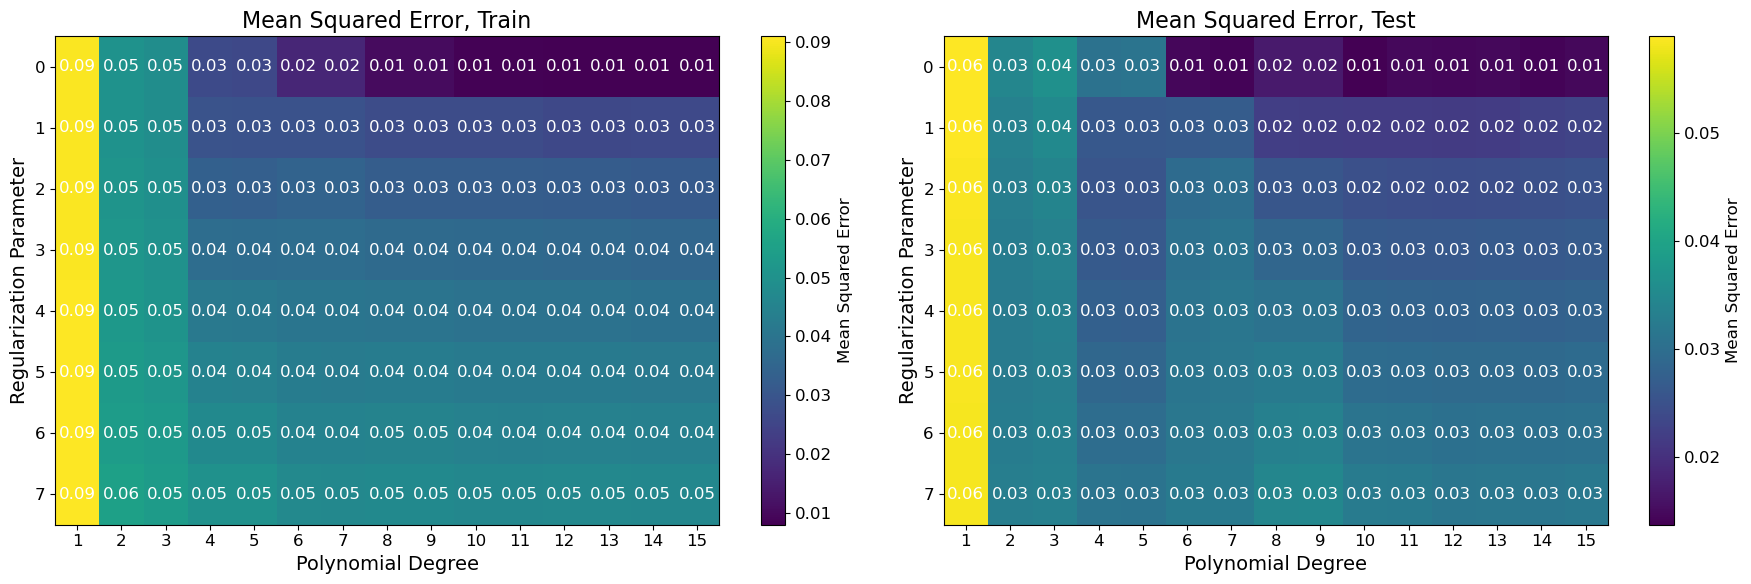

In [20]:

plt.rcParams['font.size'] = 12  # Set the global font size

# Create a combined figure with subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))  # Two subplots side by side

# Plotting the train results as a heatmap
im1 = ax1.imshow(MSE_train, aspect='auto', cmap='viridis')  # Train heatmap
ax1.set_xticks(range(cols))
ax1.set_xticklabels(degrees_ridge)
ax1.set_yticks(range(rows))
for i in range(rows):
    for j in range(cols):
        text = ax1.text(j, i, f"{MSE_train[i, j]:.2f}", ha="center", va="center", color="white")
cbar1 = fig.colorbar(im1, ax=ax1)
cbar1.set_label('Mean Squared Error', fontsize=12)
ax1.set_title("Mean Squared Error, Train", fontsize=16)
ax1.set_xlabel("Polynomial Degree", fontsize=14)
ax1.set_ylabel("Regularization Parameter", fontsize=14)

# Plotting the test results as a heatmap
im2 = ax2.imshow(MSE_test, aspect='auto', cmap='viridis')  # Test heatmap
ax2.set_xticks(range(cols))
ax2.set_xticklabels(degrees_ridge)
ax2.set_yticks(range(rows))
for i in range(rows):
    for j in range(cols):
        text = ax2.text(j, i, f"{MSE_test[i, j]:.2f}", ha="center", va="center", color="white")
cbar2 = fig.colorbar(im2, ax=ax2)
cbar2.set_label('Mean Squared Error', fontsize=12)
ax2.set_title("Mean Squared Error, Test", fontsize=16)
ax2.set_xlabel("Polynomial Degree", fontsize=14)
ax2.set_ylabel("Regularization Parameter", fontsize=14)

plt.tight_layout()
plt.savefig(os.path.join('../Fig', 'MSE_Ridge_Combined.png'))  # Save the combined figure
plt.show()


# Part c: Writing your own gradient descent code

## OLS

!!! refer to the code use from https://compphysics.github.io/MachineLearning/doc/LectureNotes/_build/html/week37.html#id1

Issue for report: need to fix dimentions for calculations by using .reshape(-1,1)

replased code from exmple by use of polynomial feature function for x, for y used reshape

In [21]:
def OLS(X_train, y_train, degree = 1):
    # prep variables
    n = len(X_train)
    X = polynomial_features(X_train, degree)
    y_train_aprox = y_train.reshape(-1,1)

    # Hessian matrix
    H_OLS = (2.0/n)* X.T @ X
    # Get the eigenvalues
    EigValues, EigVectors = np.linalg.eig(H_OLS)
    print(f"Eigenvalues of Hessian Matrix:{EigValues}")
    
    #np.random.seed(42)
    theta_gd_OLS = np.random.randn(degree + 1,1)
    eta = 1.0/np.max(EigValues)
    print('eta: \n',eta)
    Niterations = 1000
    convrg = 0
    
    for iter in range(Niterations):
        old_theta = theta_gd_OLS.copy()
        gradient = (2.0/n)*X.T @ (X @ theta_gd_OLS - y_train_aprox)
        theta_gd_OLS -= eta*gradient
        convrg +=1
        
        absolute_difference = np.abs(old_theta - theta_gd_OLS)
        if np.all(np.abs(old_theta - theta_gd_OLS) < 1e-5):
            print("Model parameters converged.")
            break 
    return theta_gd_OLS, convrg
    
theta_gd_OLS, convrg_OLS = OLS(X_train, y_train_noise, degree = 5)

print("Gradient Descent OLS coefficients:",'\n',np.round(theta_gd_OLS,4))
print('Converges at step: ',convrg_OLS)

Eigenvalues of Hessian Matrix:[4.43044314e+01 1.78898739e+01 1.22579672e+00 7.76058666e-01
 8.53988923e-02 3.01069402e-02]
eta: 
 0.022571105621584688
Gradient Descent OLS coefficients: 
 [[ 0.6392]
 [ 0.3557]
 [-0.6992]
 [-0.4026]
 [ 0.19  ]
 [ 0.1015]]
Converges at step:  1000


## Ridge

In [22]:
# reserved

def Ridge(X_train, y_train, degree, lambda_, n_iter, step_size, tolerance=None):
    """A function using Gradient Descent for estimating Ridge regression coefficients."""

    # Creating the design matrix with PolynomialFeatures
    poly = PolynomialFeatures(degree=degree, include_bias=True)
    X_poly = poly.fit_transform(X_train)

    # Dimensions
    n_samples = X_poly.shape[0]
    n_features = X_poly.shape[1]

    # Initializing empty lists for metrics
    theta_history = []
    loss_history = []
    
    # Hessian matrix
    H_Ridge = (2.0/n_samples)* X_poly.T @ X_poly + 2 * lambda_ * np.eye((X_poly.T @ X_poly).shape[0]) 
    
    # Get the eigenvalues
    EigValues, EigVectors = np.linalg.eig(H_Ridge)
    
    # Start plain gradient descent
    #theta_gd_Ridge = np.zeros((degree + 1, 1))
    np.random.seed(42)
    theta = np.zeros(n_features)
    #theta = np.random.randn(n_features) * 0.1
    
    # Setting learning rate = 1/maximum eigenvalue
    eta = 1.0/np.max(EigValues)
    
    for i in range(n_iter):
        
        # Predicting
        y_pred = X_poly @ theta
        error = y_pred - y_train
        gradient = (2.0/n_samples) * (X_poly.T @ error) + 2*lambda_ * theta

        # Updating theta
        theta -= eta * gradient

        if tolerance is not None and np.linalg.norm(gradient) < tolerance:
            print(f"Converged after {i} iterations.")
            break

        # Calculating metrics
        mse = np.mean(error**2)
        loss = mse + lambda_ * np.sum(theta**2)

        # Storing metrics (using .copy to add a list, not a pointer)
        theta_history.append(theta.copy())
        loss_history.append(loss)

    return theta_history, loss_history, theta, poly


_, _, theta_gd_Ridge, poly = Ridge(X_train.reshape(-1, 1), y_train_noise, degree=5, lambda_ = 0.0001, n_iter=1000, step_size=0.01, tolerance=1e-5)

In [23]:
degree = 5
X = polynomial_features(X_train, degree)
X_test_poly = polynomial_features(X_test, degree)

y_train_aprox = y_train_noise.reshape(-1,1)
y_test_aprox = y_test_noise.reshape(-1,1)

#OLS
MSE_train_OLS = mean_squared_error(y_train_aprox, X @ theta_gd_OLS)
MSE_test_OLS = mean_squared_error(y_test_aprox, X_test_poly @ theta_gd_OLS)

print("MSE for OLS train data: \n", MSE_train_OLS)
print("MSE for OLS test data:: \n", MSE_test_OLS, '\n')

#Ridge
MSE_train_Ridge = mean_squared_error(y_train_aprox, X @ theta_gd_Ridge)
MSE_test_Ridge = mean_squared_error(y_test_aprox, X_test_poly @ theta_gd_Ridge)

print("MSE for Ridge train data: \n", MSE_train_Ridge)
print("MSE for Ridge test data:: \n", MSE_test_Ridge, '\n')

MSE for OLS train data: 
 0.027328964353504754
MSE for OLS test data:: 
 0.03156676564582604 

MSE for Ridge train data: 
 0.02732750101515351
MSE for Ridge test data:: 
 0.027398255135298966 



# Gradient descent with momentum, AdaGrad, RMSProp and ADAM

In [24]:
from sklearn.preprocessing import PolynomialFeatures
np.random.seed(42)


# reserved

def Ridge(X_train, y_train, degree, lambda_, n_iter, step_size, tolerance=None):
    """A function using Gradient Descent for estimating Ridge regression coefficients."""

    # Creating the design matrix with PolynomialFeatures
    poly = PolynomialFeatures(degree=degree, include_bias=True)
    X_poly = poly.fit_transform(X_train)

    # Dimensions
    n_samples = X_poly.shape[0]
    n_features = X_poly.shape[1]

    # Initializing empty lists for metrics
    theta_history = []
    loss_history = []
    """
    # Hessian matrix
    H_Ridge = (2.0/n_samples)* X_poly.T @ X_poly + 2 * lambda_ * np.eye((X_poly.T @ X_poly).shape[0]) 
    
    # Get the eigenvalues
    EigValues, EigVectors = np.linalg.eig(H_Ridge)
    
    # Start plain gradient descent
    #theta_gd_Ridge = np.zeros((degree + 1, 1))
    """

    # Now we use different step sizes
    np.random.seed(42)
    theta = np.random.randn(n_features) * 0.1
    eta = step_size
    
    for i in range(n_iter):
        
        # Predicting
        y_pred = X_poly @ theta
        error = y_pred - y_train
        gradient = (2.0/n_samples) * (X_poly.T @ error) + 2*lambda_ * theta

        # Updating theta
        theta -= eta * gradient

        if tolerance is not None and np.linalg.norm(gradient) < tolerance:
            print(f"Converged after {i} iterations.")
            break

        # Calculating metrics
        mse = np.mean(error**2)
        loss = mse + lambda_ * np.sum(theta**2)

        # Storing metrics (using .copy to add a list, not a pointer)
        theta_history.append(theta.copy())
        loss_history.append(loss)

    # Returning theta_history and loss_history for debugging and proofing of validity
    return theta_history, loss_history, theta, poly



def gradient_descent_with_momentum(X_train, y_train, degree, lambda_, n_iter, step_size, momentum=0.3, tolerance=None):
    """A function implementing gradient descent with momentum, if OLS, lambda=0."""

    # Creating the design matrix with PolynomialFeatures
    poly = PolynomialFeatures(degree=degree, include_bias=True)
    X_poly = poly.fit_transform(X_train)

    # Finding the dimensions and setting up theta vector
    n_samples, n_features = X_poly.shape
    theta = np.zeros(n_features)
    #np.random.randn(n_features) * 0.1

    # Initializing the momentum
    velocity = np.zeros(n_features)

    # Initializing empty lists for metrics
    theta_history = []
    loss_history = []

    for i in range(n_iter):

        # Predicting and calculating error
        y_pred = X_poly @ theta
        error = y_pred - y_train

        # Using the analytical expression for the gradient (if OLS, lambda=0)
        gradient = 2*(X_poly.T @ error) / n_samples + 2 * lambda_ * theta

        # Checking for early convergence
        if tolerance is not None and np.linalg.norm(gradient) < tolerance:
            print(f"Converged at iteration {i+1}")
            break 

        # Updating velocity and parameters
        velocity = momentum * velocity - step_size * gradient
        theta += velocity

        # Calculating metrics
        mse = np.mean(error**2)
        loss = mse + lambda_ * np.sum(theta**2)

        # Storing metrics (using .copy to add a list, not a pointer)
        theta_history.append(theta.copy())
        loss_history.append(loss)

    return theta_history, loss_history, theta, poly


def adagrad(X_train, y_train, degree, lambda_, n_iter, step_size, eps=1e-8, tolerance=None):
    """A function implementing AdaGrad (adaptive gradients), if OLS, lambda=0."""

    # Creating the design matrix with PolynomialFeatures
    poly = PolynomialFeatures(degree=degree, include_bias=True)
    X_poly = poly.fit_transform(X_train)

    # Finding the dimensions and setting up theta vector
    n_samples, n_features = X_poly.shape
    theta = np.zeros(n_features)

    #theta = np.random.randn(n_features) * 0.1

    # Initializing the accumulator for squared gradients
    gradient_squared_sum = np.zeros(n_features)

    # Initializing empty lists for metrics
    theta_history = []
    loss_history = []

    for i in range(n_iter):

        # Predicting and calculating error
        y_pred = X_poly @ theta
        error = y_pred - y_train

        # Using the analytical expression for the gradient (if OLS, lambda=0)
        gradient = 2*(X_poly.T @ error) / n_samples + 2 * lambda_ * theta

        # Checking for early convergence
        if tolerance is not None and np.linalg.norm(gradient) < tolerance:
            print(f"Converged at iteration {i+1}")
            break 

        # Accumulating squared gradients
        gradient_squared_sum += gradient**2

        # Calculating adaptive step size
        adaptive_step = step_size / np.sqrt(gradient_squared_sum + eps)

        # Updating parameters
        theta -= adaptive_step * gradient

        # Calculating metrics
        mse = np.mean(error**2)
        loss = mse + lambda_ * np.sum(theta**2)

        # Storing metrics (using .copy to add a list, not a pointer)
        theta_history.append(theta.copy())
        loss_history.append(loss)

    return theta_history, loss_history, theta, poly


def RMSprop(X_train, y_train, degree, lambda_, n_iter, step_size, decay_rate=0.9, eps=1e-8, tolerance=None):
    """A function implementing RMSprop, if OLS, lambda=0."""

    # Creating the design matrix with PolynomialFeatures
    poly = PolynomialFeatures(degree=degree, include_bias=True)
    X_poly = poly.fit_transform(X_train)

    # Finding the dimensions and setting up theta vector
    n_samples, n_features = X_poly.shape
    theta = np.zeros(n_features)

    #theta = np.random.randn(n_features) * 0.1

    # Initializing the moving average of squared gradients
    moving_avg_squared_grad = np.zeros(n_features)

    # Initializing empty lists for metrics
    theta_history = []
    loss_history = []

    for i in range(n_iter):

        # Predicting and calculating error
        y_pred = X_poly @ theta
        error = y_pred - y_train

        # Using the analytical expression for the gradient (if OLS, lambda=0)
        gradient = 2*(X_poly.T @ error) / n_samples + 2 * lambda_ * theta

        # Checking for early convergence
        if tolerance is not None and np.linalg.norm(gradient) < tolerance:
            print(f"Converged at iteration {i+1}")
            break 

        # Updating the moving average of squared gradients with decay
        moving_avg_squared_grad = decay_rate * moving_avg_squared_grad + (1 - decay_rate) * gradient**2

        # Calculating adaptive step size
        adaptive_step = step_size / np.sqrt(moving_avg_squared_grad + eps)

        # Updating parameters
        theta -= adaptive_step * gradient

        # Calculating metrics
        mse = np.mean(error**2)
        loss = mse + lambda_ * np.sum(theta**2)

        # Storing metrics (using .copy to add a list, not a pointer)
        theta_history.append(theta.copy())
        loss_history.append(loss)

    return theta_history, loss_history, theta, poly


def ADAM(X_train, y_train, degree, lambda_, n_iter, step_size, beta_1=0.9, beta_2=0.999, eps=1e-8, tolerance=None):
    """A function implementing ADAM (combining momentum and RMSprop), if OLS, lambda=0."""

    # Creating the design matrix with PolynomialFeatures
    poly = PolynomialFeatures(degree=degree, include_bias=True)
    X_poly = poly.fit_transform(X_train)

    # Finding the dimensions and setting up theta vector
    n_samples, n_features = X_poly.shape
    theta = np.zeros(n_features)

    # theta = np.random.randn(n_features) * 0.1

    # Initializing the moving average of gradients (1st moment, momentum)
    moving_avg_grad = np.zeros(n_features)

    # Initializing the moving average of squared gradients (2nd moment, RMSprop)
    moving_avg_squared_grad = np.zeros(n_features)

    # Initializing empty lists for metrics
    theta_history = []
    loss_history = []

    for i in range(n_iter):

        # Predicting and calculating error
        y_pred = X_poly @ theta
        error = y_pred - y_train

        # Using the analytical expression for the gradient (if OLS, lambda=0)
        gradient = 2*(X_poly.T @ error) / n_samples + 2 * lambda_ * theta

        # Checking for early convergence
        if tolerance is not None and np.linalg.norm(gradient) < tolerance:
            print(f"Converged at iteration {i+1}")
            break 

        # Updating the moving average of gradients (1st moment)
        moving_avg_grad = beta_1 * moving_avg_grad + (1 - beta_1) * gradient

        # Updating the moving average of squared gradients (2nd moment)
        moving_avg_squared_grad = beta_2 * moving_avg_squared_grad + (1 - beta_2) * gradient**2

        # Bias correction to avoid initialization bias towards 0
        bias_corrected_grad = moving_avg_grad / (1 - beta_1**(i+1))
        bias_corrected_squared_grad = moving_avg_squared_grad / (1 - beta_2**(i+1))

        # Calculating adaptive step size
        adaptive_step = step_size / np.sqrt(bias_corrected_squared_grad + eps)

        # Updating parameters
        theta -= adaptive_step * bias_corrected_grad

        # Calculating metrics
        mse = np.mean(error**2)
        loss = mse + lambda_ * np.sum(theta**2)

        # Storing metrics (using .copy to add a list, not a pointer)
        theta_history.append(theta.copy())
        loss_history.append(loss)

    return theta_history, loss_history, theta, poly

theta_history, loss_history, theta, poly = ADAM(X_train.reshape(-1, 1), y_train_noise, 5, 0, 1000, 0.01, beta_1=0.9, beta_2=0.999, eps=1e-8, tolerance=1e-8)

# Transforming the test data with the same poly object
X_test_ADAM = poly.transform(X_test.reshape(-1, 1))
y_pred = X_test_ADAM @ theta
mse = np.mean((y_pred - y_test_noise)**2)
print(mse)

Converged at iteration 816
0.031177170920910813


In [25]:
# Setting up hyperparameters for grid search 
optimizers = [Ridge, gradient_descent_with_momentum, adagrad, RMSprop, ADAM]
degrees = np.arange(1, 16)
lambdas= [0.0, 0.1, 0.5, 1.0, 2.0, 10.0, 100.0]
learning_rates = [0.001, 0.01, 0.05, 0.1, 0.5]

# Tracking results
best_mse = float("inf")
best_params = {}
all_results = []


# Performing grid search
for optimizer in optimizers:
    optimizer_name = optimizer.__name__

    print(f"Testing optimizer: {optimizer_name} \n---------------------------------")

    for degree in degrees:
        for lambda_ in lambdas:
            for lr in learning_rates:

                # Training the model
                theta_history, loss_history, theta, poly = optimizer(
                    X_train.reshape(-1, 1), y_train_noise, degree=degree, lambda_=lambda_, n_iter=1000, step_size=lr, tolerance=1e-10
                )
                # Evaluating on the test set
                X_test_poly = poly.transform(X_test.reshape(-1, 1))
                y_test_pred = X_test_poly @ theta
                test_mse = np.mean((y_test_pred - y_test_noise)**2)

                # Store results
                result = {
                    "optimizer": optimizer_name,
                    "degree": degree,
                    "lambda": lambda_,
                    "learning_rate": lr,
                    "test_mse": test_mse
                }
                all_results.append(result)

                # Checking whether the mse is the best so far
                if test_mse < best_mse:
                    best_mse = test_mse
                    best_params = result.copy()

Testing optimizer: Ridge 
---------------------------------
Converged after 212 iterations.
Converged after 100 iterations.
Converged after 5 iterations.
Converged after 191 iterations.
Converged after 90 iterations.
Converged after 10 iterations.
Converged after 727 iterations.
Converged after 137 iterations.
Converged after 63 iterations.
Converged after 32 iterations.
Converged after 539 iterations.
Converged after 99 iterations.
Converged after 44 iterations.
Converged after 351 iterations.
Converged after 61 iterations.
Converged after 24 iterations.
Converged after 91 iterations.
Converged after 10 iterations.
Converged after 113 iterations.


/Users/natalliadanilchanka/anaconda3/lib/python3.11/site-packages/numpy/core/_methods.py:181: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
/var/folders/2x/86b82jhn7m5cwtv2m75stgq80000gn/T/ipykernel_13369/792846037.py:52: RuntimeWarning: overflow encountered in square
  mse = np.mean(error**2)
/var/folders/2x/86b82jhn7m5cwtv2m75stgq80000gn/T/ipykernel_13369/792846037.py:53: RuntimeWarning: overflow encountered in square
  loss = mse + lambda_ * np.sum(theta**2)
/var/folders/2x/86b82jhn7m5cwtv2m75stgq80000gn/T/ipykernel_13369/665004795.py:30: RuntimeWarning: overflow encountered in square
  test_mse = np.mean((y_test_pred - y_test_noise)**2)
/Users/natalliadanilchanka/anaconda3/lib/python3.11/site-packages/numpy/core/_methods.py:181: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
/var/folders/2x/86b82jhn7m5cwtv2m75stgq80000gn/T/ipykernel_13369/792846037.py:53: Run

Converged after 740 iterations.
Converged after 365 iterations.
Converged after 548 iterations.
Converged after 269 iterations.


/Users/natalliadanilchanka/anaconda3/lib/python3.11/site-packages/numpy/core/_methods.py:181: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
/var/folders/2x/86b82jhn7m5cwtv2m75stgq80000gn/T/ipykernel_13369/792846037.py:52: RuntimeWarning: overflow encountered in square
  mse = np.mean(error**2)
/Users/natalliadanilchanka/anaconda3/lib/python3.11/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/var/folders/2x/86b82jhn7m5cwtv2m75stgq80000gn/T/ipykernel_13369/792846037.py:53: RuntimeWarning: overflow encountered in square
  loss = mse + lambda_ * np.sum(theta**2)
/var/folders/2x/86b82jhn7m5cwtv2m75stgq80000gn/T/ipykernel_13369/665004795.py:30: RuntimeWarning: overflow encountered in square
  test_mse = np.mean((y_test_pred - y_test_noise)**2)
/Users/natalliadanilchanka/anaconda3/lib/python3.11/site-packages/numpy/core/_methods.

Converged after 266 iterations.
Converged after 127 iterations.
Converged after 836 iterations.
Converged after 159 iterations.
Converged after 74 iterations.
Converged after 466 iterations.
Converged after 84 iterations.
Converged after 36 iterations.
Converged after 95 iterations.
Converged after 17 iterations.


/Users/natalliadanilchanka/anaconda3/lib/python3.11/site-packages/numpy/core/_methods.py:181: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
/var/folders/2x/86b82jhn7m5cwtv2m75stgq80000gn/T/ipykernel_13369/792846037.py:52: RuntimeWarning: overflow encountered in square
  mse = np.mean(error**2)
/var/folders/2x/86b82jhn7m5cwtv2m75stgq80000gn/T/ipykernel_13369/792846037.py:53: RuntimeWarning: overflow encountered in square
  loss = mse + lambda_ * np.sum(theta**2)
/var/folders/2x/86b82jhn7m5cwtv2m75stgq80000gn/T/ipykernel_13369/792846037.py:42: RuntimeWarning: overflow encountered in matmul
  gradient = (2.0/n_samples) * (X_poly.T @ error) + 2*lambda_ * theta
/var/folders/2x/86b82jhn7m5cwtv2m75stgq80000gn/T/ipykernel_13369/792846037.py:42: RuntimeWarning: invalid value encountered in matmul
  gradient = (2.0/n_samples) * (X_poly.T @ error) + 2*lambda_ * theta
/var/folders/2x/86b82jhn7m5cwtv2m75stgq80000gn/T/ipykernel_13369/792

Converged after 113 iterations.
Converged after 819 iterations.


/Users/natalliadanilchanka/anaconda3/lib/python3.11/site-packages/numpy/core/_methods.py:181: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
/var/folders/2x/86b82jhn7m5cwtv2m75stgq80000gn/T/ipykernel_13369/792846037.py:52: RuntimeWarning: overflow encountered in square
  mse = np.mean(error**2)
/Users/natalliadanilchanka/anaconda3/lib/python3.11/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/var/folders/2x/86b82jhn7m5cwtv2m75stgq80000gn/T/ipykernel_13369/792846037.py:53: RuntimeWarning: invalid value encountered in scalar multiply
  loss = mse + lambda_ * np.sum(theta**2)
/var/folders/2x/86b82jhn7m5cwtv2m75stgq80000gn/T/ipykernel_13369/792846037.py:53: RuntimeWarning: overflow encountered in square
  loss = mse + lambda_ * np.sum(theta**2)
/var/folders/2x/86b82jhn7m5cwtv2m75stgq80000gn/T/ipykernel_13369/792846037.py:42: Ru

Converged after 910 iterations.
Converged after 450 iterations.
Converged after 328 iterations.
Converged after 159 iterations.
Converged after 947 iterations.
Converged after 181 iterations.
Converged after 85 iterations.
Converged after 509 iterations.
Converged after 93 iterations.
Converged after 40 iterations.
Converged after 105 iterations.
Converged after 30 iterations.
Converged after 117 iterations.


/Users/natalliadanilchanka/anaconda3/lib/python3.11/site-packages/numpy/core/_methods.py:181: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
/var/folders/2x/86b82jhn7m5cwtv2m75stgq80000gn/T/ipykernel_13369/792846037.py:52: RuntimeWarning: overflow encountered in square
  mse = np.mean(error**2)
/var/folders/2x/86b82jhn7m5cwtv2m75stgq80000gn/T/ipykernel_13369/792846037.py:53: RuntimeWarning: overflow encountered in square
  loss = mse + lambda_ * np.sum(theta**2)
/var/folders/2x/86b82jhn7m5cwtv2m75stgq80000gn/T/ipykernel_13369/792846037.py:42: RuntimeWarning: overflow encountered in matmul
  gradient = (2.0/n_samples) * (X_poly.T @ error) + 2*lambda_ * theta
/var/folders/2x/86b82jhn7m5cwtv2m75stgq80000gn/T/ipykernel_13369/792846037.py:42: RuntimeWarning: invalid value encountered in matmul
  gradient = (2.0/n_samples) * (X_poly.T @ error) + 2*lambda_ * theta
/var/folders/2x/86b82jhn7m5cwtv2m75stgq80000gn/T/ipykernel_13369/792

Converged after 837 iterations.
Converged after 379 iterations.
Converged after 195 iterations.
Converged after 527 iterations.
Converged after 97 iterations.


/Users/natalliadanilchanka/anaconda3/lib/python3.11/site-packages/numpy/core/_methods.py:181: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
/var/folders/2x/86b82jhn7m5cwtv2m75stgq80000gn/T/ipykernel_13369/792846037.py:52: RuntimeWarning: overflow encountered in square
  mse = np.mean(error**2)
/var/folders/2x/86b82jhn7m5cwtv2m75stgq80000gn/T/ipykernel_13369/792846037.py:53: RuntimeWarning: overflow encountered in square
  loss = mse + lambda_ * np.sum(theta**2)
/var/folders/2x/86b82jhn7m5cwtv2m75stgq80000gn/T/ipykernel_13369/792846037.py:42: RuntimeWarning: overflow encountered in matmul
  gradient = (2.0/n_samples) * (X_poly.T @ error) + 2*lambda_ * theta
/var/folders/2x/86b82jhn7m5cwtv2m75stgq80000gn/T/ipykernel_13369/792846037.py:42: RuntimeWarning: invalid value encountered in matmul
  gradient = (2.0/n_samples) * (X_poly.T @ error) + 2*lambda_ * theta
/var/folders/2x/86b82jhn7m5cwtv2m75stgq80000gn/T/ipykernel_13369/792

Converged after 106 iterations.
Converged after 996 iterations.
Converged after 118 iterations.


/var/folders/2x/86b82jhn7m5cwtv2m75stgq80000gn/T/ipykernel_13369/792846037.py:53: RuntimeWarning: overflow encountered in scalar multiply
  loss = mse + lambda_ * np.sum(theta**2)
/var/folders/2x/86b82jhn7m5cwtv2m75stgq80000gn/T/ipykernel_13369/792846037.py:52: RuntimeWarning: overflow encountered in square
  mse = np.mean(error**2)
/Users/natalliadanilchanka/anaconda3/lib/python3.11/site-packages/numpy/core/_methods.py:181: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
/var/folders/2x/86b82jhn7m5cwtv2m75stgq80000gn/T/ipykernel_13369/792846037.py:53: RuntimeWarning: overflow encountered in square
  loss = mse + lambda_ * np.sum(theta**2)
/var/folders/2x/86b82jhn7m5cwtv2m75stgq80000gn/T/ipykernel_13369/792846037.py:42: RuntimeWarning: overflow encountered in matmul
  gradient = (2.0/n_samples) * (X_poly.T @ error) + 2*lambda_ * theta
/var/folders/2x/86b82jhn7m5cwtv2m75stgq80000gn/T/ipykernel_13369/792846037.py:42: RuntimeWar

Converged after 547 iterations.
Converged after 108 iterations.
Converged after 119 iterations.


/Users/natalliadanilchanka/anaconda3/lib/python3.11/site-packages/numpy/core/_methods.py:181: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
/var/folders/2x/86b82jhn7m5cwtv2m75stgq80000gn/T/ipykernel_13369/792846037.py:52: RuntimeWarning: overflow encountered in square
  mse = np.mean(error**2)
/var/folders/2x/86b82jhn7m5cwtv2m75stgq80000gn/T/ipykernel_13369/792846037.py:53: RuntimeWarning: overflow encountered in scalar multiply
  loss = mse + lambda_ * np.sum(theta**2)
/var/folders/2x/86b82jhn7m5cwtv2m75stgq80000gn/T/ipykernel_13369/792846037.py:53: RuntimeWarning: overflow encountered in square
  loss = mse + lambda_ * np.sum(theta**2)
/var/folders/2x/86b82jhn7m5cwtv2m75stgq80000gn/T/ipykernel_13369/792846037.py:42: RuntimeWarning: overflow encountered in matmul
  gradient = (2.0/n_samples) * (X_poly.T @ error) + 2*lambda_ * theta
/var/folders/2x/86b82jhn7m5cwtv2m75stgq80000gn/T/ipykernel_13369/792846037.py:42: RuntimeWar

Converged after 551 iterations.
Converged after 109 iterations.
Converged after 120 iterations.


/Users/natalliadanilchanka/anaconda3/lib/python3.11/site-packages/numpy/core/_methods.py:181: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
/var/folders/2x/86b82jhn7m5cwtv2m75stgq80000gn/T/ipykernel_13369/792846037.py:52: RuntimeWarning: overflow encountered in square
  mse = np.mean(error**2)
/var/folders/2x/86b82jhn7m5cwtv2m75stgq80000gn/T/ipykernel_13369/792846037.py:53: RuntimeWarning: overflow encountered in scalar multiply
  loss = mse + lambda_ * np.sum(theta**2)
/var/folders/2x/86b82jhn7m5cwtv2m75stgq80000gn/T/ipykernel_13369/792846037.py:53: RuntimeWarning: overflow encountered in square
  loss = mse + lambda_ * np.sum(theta**2)
/var/folders/2x/86b82jhn7m5cwtv2m75stgq80000gn/T/ipykernel_13369/792846037.py:42: RuntimeWarning: overflow encountered in matmul
  gradient = (2.0/n_samples) * (X_poly.T @ error) + 2*lambda_ * theta
/var/folders/2x/86b82jhn7m5cwtv2m75stgq80000gn/T/ipykernel_13369/792846037.py:42: RuntimeWar

Converged after 120 iterations.


/var/folders/2x/86b82jhn7m5cwtv2m75stgq80000gn/T/ipykernel_13369/792846037.py:52: RuntimeWarning: overflow encountered in square
  mse = np.mean(error**2)
/Users/natalliadanilchanka/anaconda3/lib/python3.11/site-packages/numpy/core/_methods.py:181: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
/var/folders/2x/86b82jhn7m5cwtv2m75stgq80000gn/T/ipykernel_13369/792846037.py:53: RuntimeWarning: overflow encountered in square
  loss = mse + lambda_ * np.sum(theta**2)
/var/folders/2x/86b82jhn7m5cwtv2m75stgq80000gn/T/ipykernel_13369/792846037.py:42: RuntimeWarning: overflow encountered in matmul
  gradient = (2.0/n_samples) * (X_poly.T @ error) + 2*lambda_ * theta
/var/folders/2x/86b82jhn7m5cwtv2m75stgq80000gn/T/ipykernel_13369/792846037.py:40: RuntimeWarning: invalid value encountered in matmul
  y_pred = X_poly @ theta
/var/folders/2x/86b82jhn7m5cwtv2m75stgq80000gn/T/ipykernel_13369/792846037.py:52: RuntimeWarning: overflow encou

Converged after 120 iterations.


/var/folders/2x/86b82jhn7m5cwtv2m75stgq80000gn/T/ipykernel_13369/792846037.py:52: RuntimeWarning: overflow encountered in square
  mse = np.mean(error**2)
/Users/natalliadanilchanka/anaconda3/lib/python3.11/site-packages/numpy/core/_methods.py:181: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
/var/folders/2x/86b82jhn7m5cwtv2m75stgq80000gn/T/ipykernel_13369/792846037.py:53: RuntimeWarning: overflow encountered in square
  loss = mse + lambda_ * np.sum(theta**2)
/var/folders/2x/86b82jhn7m5cwtv2m75stgq80000gn/T/ipykernel_13369/792846037.py:42: RuntimeWarning: overflow encountered in matmul
  gradient = (2.0/n_samples) * (X_poly.T @ error) + 2*lambda_ * theta
/var/folders/2x/86b82jhn7m5cwtv2m75stgq80000gn/T/ipykernel_13369/792846037.py:40: RuntimeWarning: invalid value encountered in matmul
  y_pred = X_poly @ theta
/Users/natalliadanilchanka/anaconda3/lib/python3.11/site-packages/numpy/core/_methods.py:181: RuntimeWarning: ov

Converged after 175 iterations.


/var/folders/2x/86b82jhn7m5cwtv2m75stgq80000gn/T/ipykernel_13369/792846037.py:52: RuntimeWarning: overflow encountered in square
  mse = np.mean(error**2)
/Users/natalliadanilchanka/anaconda3/lib/python3.11/site-packages/numpy/core/_methods.py:181: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
/var/folders/2x/86b82jhn7m5cwtv2m75stgq80000gn/T/ipykernel_13369/792846037.py:53: RuntimeWarning: overflow encountered in square
  loss = mse + lambda_ * np.sum(theta**2)
/var/folders/2x/86b82jhn7m5cwtv2m75stgq80000gn/T/ipykernel_13369/792846037.py:42: RuntimeWarning: overflow encountered in matmul
  gradient = (2.0/n_samples) * (X_poly.T @ error) + 2*lambda_ * theta
/var/folders/2x/86b82jhn7m5cwtv2m75stgq80000gn/T/ipykernel_13369/792846037.py:40: RuntimeWarning: invalid value encountered in matmul
  y_pred = X_poly @ theta
/var/folders/2x/86b82jhn7m5cwtv2m75stgq80000gn/T/ipykernel_13369/792846037.py:53: RuntimeWarning: overflow encou

Testing optimizer: gradient_descent_with_momentum 
---------------------------------
Converged at iteration 766
Converged at iteration 135
Converged at iteration 48
Converged at iteration 36
Converged at iteration 694
Converged at iteration 121
Converged at iteration 39
Converged at iteration 38
Converged at iteration 503
Converged at iteration 80
Converged at iteration 37
Converged at iteration 39
Converged at iteration 372
Converged at iteration 48
Converged at iteration 39
Converged at iteration 39
Converged at iteration 241
Converged at iteration 36
Converged at iteration 38
Converged at iteration 693
Converged at iteration 36
Converged at iteration 36
Converged at iteration 40
Converged at iteration 46
Converged at iteration 37
Converged at iteration 507
Converged at iteration 243
Converged at iteration 53
Converged at iteration 372
Converged at iteration 175
Converged at iteration 148
Converged at iteration 949
Converged at iteration 173
Converged at iteration 73
Converged at ite

/Users/natalliadanilchanka/anaconda3/lib/python3.11/site-packages/numpy/core/_methods.py:181: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
/var/folders/2x/86b82jhn7m5cwtv2m75stgq80000gn/T/ipykernel_13369/792846037.py:102: RuntimeWarning: overflow encountered in square
  mse = np.mean(error**2)
/var/folders/2x/86b82jhn7m5cwtv2m75stgq80000gn/T/ipykernel_13369/792846037.py:103: RuntimeWarning: overflow encountered in square
  loss = mse + lambda_ * np.sum(theta**2)
/var/folders/2x/86b82jhn7m5cwtv2m75stgq80000gn/T/ipykernel_13369/665004795.py:30: RuntimeWarning: overflow encountered in square
  test_mse = np.mean((y_test_pred - y_test_noise)**2)
/Users/natalliadanilchanka/anaconda3/lib/python3.11/site-packages/numpy/core/_methods.py:181: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
/var/folders/2x/86b82jhn7m5cwtv2m75stgq80000gn/T/ipykernel_13369/792846037.py:103: 

Converged at iteration 203
Converged at iteration 91
Converged at iteration 598
Converged at iteration 103
Converged at iteration 38
Converged at iteration 317
Converged at iteration 39
Converged at iteration 39
Converged at iteration 726
Converged at iteration 42
Converged at iteration 37
Converged at iteration 46
Converged at iteration 39


/Users/natalliadanilchanka/anaconda3/lib/python3.11/site-packages/numpy/core/_methods.py:181: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
/var/folders/2x/86b82jhn7m5cwtv2m75stgq80000gn/T/ipykernel_13369/792846037.py:102: RuntimeWarning: overflow encountered in square
  mse = np.mean(error**2)
/var/folders/2x/86b82jhn7m5cwtv2m75stgq80000gn/T/ipykernel_13369/792846037.py:103: RuntimeWarning: overflow encountered in square
  loss = mse + lambda_ * np.sum(theta**2)
/var/folders/2x/86b82jhn7m5cwtv2m75stgq80000gn/T/ipykernel_13369/792846037.py:90: RuntimeWarning: overflow encountered in matmul
  gradient = 2*(X_poly.T @ error) / n_samples + 2 * lambda_ * theta
/var/folders/2x/86b82jhn7m5cwtv2m75stgq80000gn/T/ipykernel_13369/792846037.py:90: RuntimeWarning: overflow encountered in multiply
  gradient = 2*(X_poly.T @ error) / n_samples + 2 * lambda_ * theta
/var/folders/2x/86b82jhn7m5cwtv2m75stgq80000gn/T/ipykernel_13369/79284603

Converged at iteration 997
Converged at iteration 489
Converged at iteration 248
Converged at iteration 113
Converged at iteration 675
Converged at iteration 118
Converged at iteration 39
Converged at iteration 335
Converged at iteration 41
Converged at iteration 41
Converged at iteration 720
Converged at iteration 44
Converged at iteration 39
Converged at iteration 46
Converged at iteration 40
Converged at iteration 248
Converged at iteration 675
Converged at iteration 119
Converged at iteration 336
Converged at iteration 55
Converged at iteration 720
Converged at iteration 44
Converged at iteration 46
Converged at iteration 72


/Users/natalliadanilchanka/anaconda3/lib/python3.11/site-packages/numpy/core/_methods.py:181: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
/var/folders/2x/86b82jhn7m5cwtv2m75stgq80000gn/T/ipykernel_13369/792846037.py:102: RuntimeWarning: overflow encountered in square
  mse = np.mean(error**2)
/var/folders/2x/86b82jhn7m5cwtv2m75stgq80000gn/T/ipykernel_13369/792846037.py:103: RuntimeWarning: overflow encountered in square
  loss = mse + lambda_ * np.sum(theta**2)
/var/folders/2x/86b82jhn7m5cwtv2m75stgq80000gn/T/ipykernel_13369/792846037.py:90: RuntimeWarning: overflow encountered in matmul
  gradient = 2*(X_poly.T @ error) / n_samples + 2 * lambda_ * theta
/var/folders/2x/86b82jhn7m5cwtv2m75stgq80000gn/T/ipykernel_13369/792846037.py:90: RuntimeWarning: invalid value encountered in matmul
  gradient = 2*(X_poly.T @ error) / n_samples + 2 * lambda_ * theta
/var/folders/2x/86b82jhn7m5cwtv2m75stgq80000gn/T/ipykernel_13369/79284

Converged at iteration 657
Converged at iteration 331
Converged at iteration 723
Converged at iteration 43
Converged at iteration 46
Converged at iteration 723
Converged at iteration 46


/var/folders/2x/86b82jhn7m5cwtv2m75stgq80000gn/T/ipykernel_13369/792846037.py:102: RuntimeWarning: overflow encountered in square
  mse = np.mean(error**2)
/Users/natalliadanilchanka/anaconda3/lib/python3.11/site-packages/numpy/core/_methods.py:181: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
/var/folders/2x/86b82jhn7m5cwtv2m75stgq80000gn/T/ipykernel_13369/792846037.py:103: RuntimeWarning: overflow encountered in square
  loss = mse + lambda_ * np.sum(theta**2)
/var/folders/2x/86b82jhn7m5cwtv2m75stgq80000gn/T/ipykernel_13369/792846037.py:90: RuntimeWarning: overflow encountered in matmul
  gradient = 2*(X_poly.T @ error) / n_samples + 2 * lambda_ * theta
/var/folders/2x/86b82jhn7m5cwtv2m75stgq80000gn/T/ipykernel_13369/792846037.py:90: RuntimeWarning: overflow encountered in multiply
  gradient = 2*(X_poly.T @ error) / n_samples + 2 * lambda_ * theta
/var/folders/2x/86b82jhn7m5cwtv2m75stgq80000gn/T/ipykernel_13369/79284603

Converged at iteration 725
Converged at iteration 46
Converged at iteration 724
Converged at iteration 46


/Users/natalliadanilchanka/anaconda3/lib/python3.11/site-packages/numpy/core/_methods.py:181: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
/var/folders/2x/86b82jhn7m5cwtv2m75stgq80000gn/T/ipykernel_13369/792846037.py:102: RuntimeWarning: overflow encountered in square
  mse = np.mean(error**2)
/var/folders/2x/86b82jhn7m5cwtv2m75stgq80000gn/T/ipykernel_13369/792846037.py:103: RuntimeWarning: overflow encountered in square
  loss = mse + lambda_ * np.sum(theta**2)
/var/folders/2x/86b82jhn7m5cwtv2m75stgq80000gn/T/ipykernel_13369/792846037.py:90: RuntimeWarning: overflow encountered in multiply
  gradient = 2*(X_poly.T @ error) / n_samples + 2 * lambda_ * theta
/var/folders/2x/86b82jhn7m5cwtv2m75stgq80000gn/T/ipykernel_13369/792846037.py:90: RuntimeWarning: invalid value encountered in matmul
  gradient = 2*(X_poly.T @ error) / n_samples + 2 * lambda_ * theta
/var/folders/2x/86b82jhn7m5cwtv2m75stgq80000gn/T/ipykernel_13369/792

Testing optimizer: adagrad 
---------------------------------
Converged at iteration 221
Converged at iteration 67
Converged at iteration 25
Converged at iteration 187
Converged at iteration 57
Converged at iteration 24
Converged at iteration 110
Converged at iteration 33
Converged at iteration 22
Converged at iteration 67
Converged at iteration 18
Converged at iteration 19
Converged at iteration 546
Converged at iteration 33
Converged at iteration 12
Converged at iteration 16
Converged at iteration 57
Converged at iteration 24
Converged at iteration 18
Converged at iteration 11
Converged at iteration 66
Converged at iteration 19
Converged at iteration 11
Converged at iteration 10
Converged at iteration 8
Converged at iteration 744
Converged at iteration 250
Converged at iteration 141
Converged at iteration 472
Converged at iteration 167
Converged at iteration 108
Converged at iteration 169
Converged at iteration 68
Converged at iteration 59
Converged at iteration 86
Converged at itera

In [26]:
# Displaying grid search results
print(f"{'-'*50}")
print(f"\nBest Test MSE: {best_mse:.6f}")
print(f"Best Optimizer: {best_params['optimizer']}")
print(f"Best Degree: {best_params['degree']}")
print(f"Best Lambda: {best_params['lambda']}")
print(f"Best Learning Rate: {best_params['learning_rate']}")

# Asserting that the number of configurations
print(len(all_results))

# Using DataFrame from pandas to visualize
import pandas as pd
df_results = pd.DataFrame(all_results)
print(f"\nTop 10 Ridge regression configurations:")
print(df_results.nsmallest(10, 'test_mse'))

--------------------------------------------------

Best Test MSE: 0.014617
Best Optimizer: ADAM
Best Degree: 6
Best Lambda: 0.0
Best Learning Rate: 0.01
2625

Top 10 Ridge regression configurations:
     optimizer  degree  lambda  learning_rate  test_mse
2276      ADAM       6     0.0           0.01  0.014617
2277      ADAM       6     0.0           0.05  0.014744
2278      ADAM       6     0.0           0.10  0.014794
2279      ADAM       6     0.0           0.50  0.014843
2311      ADAM       7     0.0           0.01  0.014972
2312      ADAM       7     0.0           0.05  0.015042
2313      ADAM       7     0.0           0.10  0.015086
2314      ADAM       7     0.0           0.50  0.015121
2346      ADAM       8     0.0           0.01  0.017367
2347      ADAM       8     0.0           0.05  0.017399


# Lasso regression

In [27]:
# Since we do not have an analytical solution for the estimated parameters in Lasso regression, we can use an iterative method like Gradient Descent
# The only change from the GD methods in Ridge/OLS, is the regularization term: we change the square of theta with the absolute value of theta
# A weakness of these functions is the use of np.sign(theta) in the gradient; the discontinuity at 0 could cause parameters to oscillate around 0 instead
# of being set to exactly 0.

def GD_lasso(X_train, y_train, degree, lambda_, n_iter, step_size, tolerance=None):
    """A function implementing standard gradient descent."""

    # Creating the design matrix with PolynomialFeatures
    poly = PolynomialFeatures(degree=degree, include_bias=True)
    X_poly = poly.fit_transform(X_train)

    # Finding the dimensions and setting up theta vector
    n_samples, n_features = X_poly.shape
    theta = np.random.randn(n_features) * 0.1

    # Initializing empty lists for metrics
    theta_history = []
    loss_history = []

    for i in range(n_iter):

        # Predicting and calculating error
        y_pred = X_poly @ theta
        error = y_pred - y_train

        # Using the gradient of Lasso Regression, which gives np.sign(theta)*lambda in the penalty term
        gradient = 2*(X_poly.T @ error) / n_samples + lambda_ * np.sign(theta)

        # Checking for early convergence
        if tolerance is not None and np.linalg.norm(gradient) < tolerance:
            print(f"Converged at iteration {i+1}")
            break 

        # Updating theta
        theta -= step_size * gradient

        # Calculating metrics (using the absolute value of theta instead of the square)
        mse = np.mean(error**2)
        loss = mse + lambda_ * np.sum(np.abs(theta))

        # Storing metrics (using .copy to add a list, not a pointer)
        theta_history.append(theta.copy())
        loss_history.append(loss)

    return theta_history, loss_history, theta, poly


def lasso_GD_with_momentum(X_train, y_train, degree, lambda_, n_iter, step_size, momentum=0.3, tolerance=None):
    """A function implementing gradient descent for Lasso regression with momentum."""

    # Creating the design matrix with PolynomialFeatures
    poly = PolynomialFeatures(degree=degree, include_bias=True)
    X_poly = poly.fit_transform(X_train)

    # Finding the dimensions and setting up theta vector
    n_samples, n_features = X_poly.shape
    theta = np.random.randn(n_features) * 0.1

    # Initializing the momentum
    velocity = np.zeros(n_features)

    # Initializing empty lists for metrics
    theta_history = []
    loss_history = []

    for i in range(n_iter):

        # Predicting and calculating error
        y_pred = X_poly @ theta
        error = y_pred - y_train

        # Using the gradient of Lasso Regression, which gives np.sign(theta)*lambda in the penalty term
        gradient = 2*(X_poly.T @ error) / n_samples + lambda_ * np.sign(theta)

        # Checking for early convergence
        if tolerance is not None and np.linalg.norm(gradient) < tolerance:
            print(f"Converged at iteration {i+1}")
            break 

        # Updating velocity and parameters
        velocity = momentum * velocity - step_size * gradient
        theta += velocity

        # Calculating metrics (using the absolute value of theta instead of the square)
        mse = np.mean(error**2)
        loss = mse + lambda_ * np.sum(np.abs(theta))

        # Storing metrics (using .copy to add a list, not a pointer)
        theta_history.append(theta.copy())
        loss_history.append(loss)

    return theta_history, loss_history, theta, poly


def lasso_adagrad(X_train, y_train, degree, lambda_, n_iter, step_size, eps=1e-8, tolerance=None):
    """A function implementing AdaGrad (adaptive gradients) for Lasso regression."""

    # Creating the design matrix with PolynomialFeatures
    poly = PolynomialFeatures(degree=degree, include_bias=True)
    X_poly = poly.fit_transform(X_train)

    # Finding the dimensions and setting up theta vector
    n_samples, n_features = X_poly.shape
    theta = np.random.randn(n_features) * 0.1

    # Initializing the accumulator for squared gradients
    gradient_squared_sum = np.zeros(n_features)

    # Initializing empty lists for metrics
    theta_history = []
    loss_history = []

    for i in range(n_iter):

        # Predicting and calculating error
        y_pred = X_poly @ theta
        error = y_pred - y_train

        # Using the same expression for the gradient as in previous function
        gradient = 2*(X_poly.T @ error) / n_samples + lambda_ * np.sign(theta)

        # Checking for early convergence
        if tolerance is not None and np.linalg.norm(gradient) < tolerance:
            print(f"Converged at iteration {i+1}")
            break 

        # Accumulating squared gradients
        gradient_squared_sum += gradient**2

        # Calculating adaptive step size
        adaptive_step = step_size / np.sqrt(gradient_squared_sum + eps)

        # Updating parameters
        theta -= adaptive_step * gradient

        # Calculating metrics
        mse = np.mean(error**2)
        loss = mse + lambda_ * np.sum(np.abs(theta))

        # Storing metrics (using .copy to add a list, not a pointer)
        theta_history.append(theta.copy())
        loss_history.append(loss)

    return theta_history, loss_history, theta, poly


def lasso_RMSprop(X_train, y_train, degree, lambda_, n_iter, step_size, decay_rate=0.9, eps=1e-8, tolerance=None):
    """A function implementing RMSprop for Lasso regression."""

    # Creating the design matrix with PolynomialFeatures
    poly = PolynomialFeatures(degree=degree, include_bias=True)
    X_poly = poly.fit_transform(X_train)

    # Finding the dimensions and setting up theta vector
    n_samples, n_features = X_poly.shape
    theta = np.random.randn(n_features) * 0.1

    # Initializing the moving average of squared gradients
    moving_avg_squared_grad = np.zeros(n_features)

    # Initializing empty lists for metrics
    theta_history = []
    loss_history = []

    for i in range(n_iter):

        # Predicting and calculating error
        y_pred = X_poly @ theta
        error = y_pred - y_train

        # Using the same expression as before for the gradient
        gradient = 2*(X_poly.T @ error) / n_samples + lambda_ * np.sign(theta)

        # Checking for early convergence
        if tolerance is not None and np.linalg.norm(gradient) < tolerance:
            print(f"Converged at iteration {i+1}")
            break 

        # Updating the moving average of squared gradients with decay
        moving_avg_squared_grad = decay_rate * moving_avg_squared_grad + (1 - decay_rate) * gradient**2

        # Calculating adaptive step size
        adaptive_step = step_size / np.sqrt(moving_avg_squared_grad + eps)

        # Updating parameters
        theta -= adaptive_step * gradient

        # Calculating metrics
        mse = np.mean(error**2)
        loss = mse + lambda_ * np.sum(np.abs(theta))

        # Storing metrics (using .copy to add a list, not a pointer)
        theta_history.append(theta.copy())
        loss_history.append(loss)

    return theta_history, loss_history, theta, poly


def lasso_ADAM(X_train, y_train, degree, lambda_, n_iter, step_size, beta_1=0.9, beta_2=0.999, eps=1e-8, tolerance=None):
    """A function implementing ADAM (combining momentum and RMSprop) for Lasso regression."""

    # Creating the design matrix with PolynomialFeatures
    poly = PolynomialFeatures(degree=degree, include_bias=True)
    X_poly = poly.fit_transform(X_train)

    # Finding the dimensions and setting up theta vector
    n_samples, n_features = X_poly.shape
    theta = np.random.randn(n_features) * 0.1

    # Initializing the moving average of gradients (1st moment, momentum)
    moving_avg_grad = np.zeros(n_features)

    # Initializing the moving average of squared gradients (2nd moment, RMSprop)
    moving_avg_squared_grad = np.zeros(n_features)

    # Initializing empty lists for metrics
    theta_history = []
    loss_history = []

    for i in range(n_iter):

        # Predicting and calculating error
        y_pred = X_poly @ theta
        error = y_pred - y_train

        # Using the same expression as before for the gradient
        gradient = 2*(X_poly.T @ error) / n_samples + lambda_ * np.sign(theta)

        # Checking for early convergence
        if tolerance is not None and np.linalg.norm(gradient) < tolerance:
            print(f"Converged at iteration {i+1}")
            break 

        # Updating the moving average of gradients (1st moment)
        moving_avg_grad = beta_1 * moving_avg_grad + (1 - beta_1) * gradient

        # Updating the moving average of squared gradients (2nd moment)
        moving_avg_squared_grad = beta_2 * moving_avg_squared_grad + (1 - beta_2) * gradient**2

        # Bias correction to avoid initialization bias towards 0
        bias_corrected_grad = moving_avg_grad / (1 - beta_1**(i+1))
        bias_corrected_squared_grad = moving_avg_squared_grad / (1 - beta_2**(i+1))

        # Calculating adaptive step size
        adaptive_step = step_size / np.sqrt(bias_corrected_squared_grad + eps)

        # Updating parameters
        theta -= adaptive_step * bias_corrected_grad

        # Calculating metrics
        mse = np.mean(error**2)
        loss = mse + lambda_ * np.sum(np.abs(theta))

        # Storing metrics (using .copy to add a list, not a pointer)
        theta_history.append(theta.copy())
        loss_history.append(loss)

    return theta_history, loss_history, theta, poly

In [28]:
# Setting up hyperparameters for grid search 
optimizers = [GD_lasso, lasso_GD_with_momentum, lasso_adagrad, lasso_RMSprop, lasso_ADAM]
degrees = np.arange(1, 16)
lambdas= [0.1, 0.5, 1.0, 2.0, 10.0, 100.0]
learning_rates = [0.001, 0.01, 0.05, 0.1, 0.5]

# Tracking results
best_mse_lasso = float("inf")
best_params_lasso = {}
all_results_lasso = []


# Performing grid search
for optimizer in optimizers:
    optimizer_name = optimizer.__name__

    print(f"Testing optimizer: {optimizer_name} \n---------------------------------")

    for degree in degrees:
        for lambda_ in lambdas:
            for lr in learning_rates:

                # Training the model
                theta_history, loss_history, theta, poly = optimizer(
                    X_train.reshape(-1, 1), y_train_noise, degree=degree, lambda_=lambda_, n_iter=1000, step_size=lr, tolerance=1e-5
                )
                # Evaluating on the test set
                X_test_poly = poly.transform(X_test.reshape(-1, 1))
                y_test_pred = X_test_poly @ theta
                test_mse = np.mean((y_test_pred - y_test_noise)**2)

                # Store results
                result = {
                    "optimizer": optimizer_name,
                    "degree": degree,
                    "lambda": lambda_,
                    "learning_rate": lr,
                    "test_mse": test_mse
                }
                all_results_lasso.append(result)

                # Checking whether the mse is the best so far
                if test_mse < best_mse_lasso:
                    best_mse_lasso = test_mse
                    best_params_lasso = result.copy()

Testing optimizer: GD_lasso 
---------------------------------


/Users/natalliadanilchanka/anaconda3/lib/python3.11/site-packages/numpy/core/_methods.py:181: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
/var/folders/2x/86b82jhn7m5cwtv2m75stgq80000gn/T/ipykernel_13369/229988796.py:39: RuntimeWarning: overflow encountered in square
  mse = np.mean(error**2)
/var/folders/2x/86b82jhn7m5cwtv2m75stgq80000gn/T/ipykernel_13369/229988796.py:28: RuntimeWarning: overflow encountered in multiply
  gradient = 2*(X_poly.T @ error) / n_samples + lambda_ * np.sign(theta)
/var/folders/2x/86b82jhn7m5cwtv2m75stgq80000gn/T/ipykernel_13369/229988796.py:28: RuntimeWarning: invalid value encountered in matmul
  gradient = 2*(X_poly.T @ error) / n_samples + lambda_ * np.sign(theta)
/var/folders/2x/86b82jhn7m5cwtv2m75stgq80000gn/T/ipykernel_13369/229988796.py:36: RuntimeWarning: invalid value encountered in subtract
  theta -= step_size * gradient
/Users/natalliadanilchanka/anaconda3/lib/python3.11/site-packag

Testing optimizer: lasso_GD_with_momentum 
---------------------------------


/Users/natalliadanilchanka/anaconda3/lib/python3.11/site-packages/numpy/core/_methods.py:181: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
/var/folders/2x/86b82jhn7m5cwtv2m75stgq80000gn/T/ipykernel_13369/229988796.py:86: RuntimeWarning: overflow encountered in square
  mse = np.mean(error**2)
/var/folders/2x/86b82jhn7m5cwtv2m75stgq80000gn/T/ipykernel_13369/229988796.py:74: RuntimeWarning: overflow encountered in multiply
  gradient = 2*(X_poly.T @ error) / n_samples + lambda_ * np.sign(theta)
/var/folders/2x/86b82jhn7m5cwtv2m75stgq80000gn/T/ipykernel_13369/229988796.py:74: RuntimeWarning: invalid value encountered in matmul
  gradient = 2*(X_poly.T @ error) / n_samples + lambda_ * np.sign(theta)
/var/folders/2x/86b82jhn7m5cwtv2m75stgq80000gn/T/ipykernel_13369/229988796.py:82: RuntimeWarning: invalid value encountered in subtract
  velocity = momentum * velocity - step_size * gradient
/Users/natalliadanilchanka/anaconda3/li

Testing optimizer: lasso_adagrad 
---------------------------------
Testing optimizer: lasso_RMSprop 
---------------------------------
Testing optimizer: lasso_ADAM 
---------------------------------


In [29]:
# Displaying grid search results
print(f"{'-'*50}")
print(f"\nBest Test MSE: {best_mse_lasso:.6f}")
print(f"Best Optimizer: {best_params_lasso['optimizer']}")
print(f"Best Degree: {best_params_lasso['degree']}")
print(f"Best Lambda: {best_params_lasso['lambda']}")
print(f"Best Learning Rate: {best_params_lasso['learning_rate']}")

# Asserting that the number of configurations
print(f"Total number of configurations: {len(all_results_lasso)}")

# Using DataFrame from pandas to visualize
import pandas as pd
df_results_lasso = pd.DataFrame(all_results_lasso)
print(f"\nTop 10 Lasso regression configurations:")
print(df_results_lasso.nsmallest(10, 'test_mse'))

--------------------------------------------------

Best Test MSE: 0.029801
Best Optimizer: lasso_adagrad
Best Degree: 11
Best Lambda: 0.1
Best Learning Rate: 0.5
Total number of configurations: 2250

Top 10 Lasso regression configurations:
                   optimizer  degree  lambda  learning_rate  test_mse
1204           lasso_adagrad      11     0.1          0.500  0.029801
1862              lasso_ADAM       3     0.1          0.050  0.038580
63                  GD_lasso       3     0.1          0.100  0.038683
33                  GD_lasso       2     0.1          0.100  0.038776
512   lasso_GD_with_momentum       3     0.1          0.050  0.038937
1380           lasso_RMSprop       2     0.1          0.001  0.038961
1410           lasso_RMSprop       3     0.1          0.001  0.038985
962            lasso_adagrad       3     0.1          0.050  0.038993
932            lasso_adagrad       2     0.1          0.050  0.038994
481   lasso_GD_with_momentum       2     0.1          0.010

# Stochastic gradient descent / mini-batch gradient descent

In [30]:
# Since we now have many different methods, we can use functional programming in order to test different optimizers in SGD

# First, we need are 2 different gradients: OLS/Ridge and Lasso

def gradient_ols_ridge(X, y, theta, lambda_=0.0):
    """Compute gradient for OLS or Ridge regression (default lambda=0 -> OLS, else -> Ridge)."""
    
    n_samples = X.shape[0]
    y_pred = X @ theta
    error = y_pred - y
    gradient = 2 * (X.T @ error) / n_samples + 2 * lambda_ * theta

    return gradient


def gradient_lasso(X, y, theta, lambda_):
    """Compute gradient for Lasso regression."""

    n_samples = X.shape[0]
    y_pred = X @ theta
    error = y_pred - y
    gradient = 2 * (X.T @ error) / n_samples + lambda_ * np.sign(theta)

    return gradient

# Now, we make separate functions for all the 5 optimizers used so far:

def update_standard_gd(theta, gradient, state, step_size):
    """Standard GD update."""

    theta_new = theta - step_size * gradient

    return theta_new, state


def update_momentum(theta, gradient, state, step_size, momentum=0.9):
    """Momentum update."""

    # Using the state.get() to retrieve current velocity value
    velocity = state.get('velocity', np.zeros_like(theta))
    velocity = momentum * velocity - step_size * gradient
    theta_new = theta + velocity
    state['velocity'] = velocity

    return theta_new, state


def update_adagrad(theta, gradient, state, step_size, eps=1e-8):
    """AdaGrad update."""

    # As in Momentum, we use the state.get() to get the current values
    grad_sq_sum = state.get('grad_sq_sum', np.zeros_like(theta))
    grad_sq_sum += gradient**2
    adaptive_step = step_size / np.sqrt(grad_sq_sum + eps)
    theta_new = theta - adaptive_step * gradient
    state['grad_sq_sum'] = grad_sq_sum

    return theta_new, state


def update_rmsprop(theta, gradient, state, step_size, decay_rate=0.9, eps=1e-8):
    """RMSprop update."""

    moving_avg = state.get('moving_avg', np.zeros_like(theta))
    moving_avg = decay_rate * moving_avg + (1 - decay_rate) * gradient**2
    adaptive_step = step_size / np.sqrt(moving_avg + eps)
    theta_new = theta - adaptive_step * gradient
    state['moving_avg'] = moving_avg

    return theta_new, state


def update_adam(theta, gradient, state, step_size, beta_1=0.9, beta_2=0.999, eps=1e-8):
    """Adam update."""

    m = state.get('m', np.zeros_like(theta))
    v = state.get('v', np.zeros_like(theta))
    t = state.get('t', 0) + 1
    
    m = beta_1 * m + (1 - beta_1) * gradient
    v = beta_2 * v + (1 - beta_2) * gradient**2
    
    m_hat = m / (1 - beta_1**t)
    v_hat = v / (1 - beta_2**t)
    
    theta_new = theta - step_size * m_hat / (np.sqrt(v_hat) + eps)
    
    state['m'] = m
    state['v'] = v
    state['t'] = t

    return theta_new, state


# Now we need the loss function for calculating the MSE of our models
def compute_loss(X, y, theta, lambda_=0.0, penalty='ridge'):
    """Compute loss with regularization: L2 for OLS/Ridge and L1 for Lasso."""

    # Predicting
    y_pred = X @ theta
    error = y_pred - y
    mse = np.mean(error**2)
    
    # Using the L2 loss if we have specified OLS or Ridge
    if penalty == 'ridge' or penalty == 'ols':
        regularization = lambda_ * np.sum(theta**2)
    # If not OLS and Ridge, we assume Lasso and L1 loss
    else: 
        regularization = lambda_ * np.sum(np.abs(theta))

    # We return the mean squared error + the regularization term
    return mse + regularization



# Now we are finally ready to make the general SGD function!
def SGD_regression(X_train, y_train, degree, lambda_, n_iter, step_size,
                     gradient_func, update_func, penalty='ridge',
                     batch_size=None, tolerance=None, **optimizer_kwargs):
    """
    A general SGD function for polynomial regression with variable:
    - Loss function (OLS, Ridge, Lasso)
    - Optimizer (GD, Momentum, Adam, RMSprop, AdaGrad)
    - Training mode (full-batch or mini-batch SGD)
    
    Also note **optimizer_kwargs, which is a flexible way of passing a variable number of inputs, which is 
    needed for our various optimizers."""
    
    # Create our design matrix
    poly = PolynomialFeatures(degree=degree, include_bias=True)
    X_poly = poly.fit_transform(X_train)
    
    # Setting up empty theta
    n_samples, n_features = X_poly.shape
    theta = np.random.randn(n_features) * 0.1
    
    # Initializing optimizer state
    optimizer_state = {}
    
    for i in range(n_iter):
        # Determining if using SGD (if None, we use full-batch gradient descent)
        if batch_size is not None:

            # Now we do mini-batch SGD
            # Permuting the indices randomly and assigning values
            indices = np.random.permutation(n_samples)
            X_shuffled = X_poly[indices]
            y_shuffled = y_train[indices]
            
            # Now we process each mini-batch
            for start_idx in range(0, n_samples, batch_size):

                # Keeping track of the last index in the batch (min() in case of non-full batch)
                end_idx = min(start_idx + batch_size, n_samples)
                
                # Now we collect our batches from the permuted samples
                X_batch = X_shuffled[start_idx:end_idx]
                y_batch = y_shuffled[start_idx:end_idx]
                
                # Compute gradient on mini-batch
                gradient = gradient_func(X_batch, y_batch, theta, lambda_)
                
                # Update parameters using the provided update function
                theta, optimizer_state = update_func(theta, gradient, optimizer_state, 
                                                     step_size, **optimizer_kwargs)
        else:
            # Full batch GD (normal GD)
            gradient = gradient_func(X_poly, y_train, theta, lambda_)
            
            # Check for early convergence as before
            if tolerance is not None and np.linalg.norm(gradient) < tolerance:
                print(f"Converged at iteration {i+1}")
                break
            
            # Update parameters using the provided optimizer
            theta, optimizer_state = update_func(theta, gradient, optimizer_state, 
                                                 step_size, **optimizer_kwargs)
        
        # Check convergence for SGD
        if batch_size and tolerance is not None:
            gradient_full = gradient_func(X_poly, y_train, theta, lambda_)
            if np.linalg.norm(gradient_full) < tolerance:
                print(f"Converged at iteration {i+1}")
                break

    
    return theta, poly

### Performing grid search using the SGD 

In [31]:
# Define optimizer configurations
optimizers_config = {
    'GD': {'update_func': update_standard_gd, 'kwargs': {}},
    'Momentum': {'update_func': update_momentum, 'kwargs': {'momentum': 0.9}},
    'AdaGrad': {'update_func': update_adagrad, 'kwargs': {'eps': 1e-8}},
    'RMSprop': {'update_func': update_rmsprop, 'kwargs': {'decay_rate': 0.9, 'eps': 1e-8}},
    'ADAM': {'update_func': update_adam, 'kwargs': {'beta_1': 0.9, 'beta_2': 0.999, 'eps': 1e-8}}
}

# Define regularization types
penalties_config = {
    'Ridge': {'gradient_func': gradient_ols_ridge, 'lambdas': [0.0, 0.1, 1.0, 100.0]},
    'Lasso': {'gradient_func': gradient_lasso, 'lambdas': [0.1, 1.0, 100.0]}
}

# Hyperparameters for search grid
degrees = np.arange(1, 9)
learning_rates = [0.001, 0.01, 0.1]
batch_sizes = [None, 16, 32]  # None = full-batch GD, others = mini-batch SGD

# Tracking the results 
best_mse = float("inf")
best_params = {}
all_results = []

# Grid search over optimizers, regularization term (loss) with lambdas, degree of polynomial, learning rate and batch sizes.
# First we unpack the dictionary with different loss (L1 or L2) and loop through all configurations
for penalty_name, penalty_config in penalties_config.items():

    # Now we specify the gradient function and lambda
    gradient_func = penalty_config['gradient_func']
    lambdas = penalty_config['lambdas']
    
    # Going through all optimizers
    for optimizer_name, optimizer_config in optimizers_config.items():

        update_func = optimizer_config['update_func']
        optimizer_kwargs = optimizer_config['kwargs']
        
        model_name = f"{optimizer_name}_{penalty_name}"
        
        # Grid search over remaining hyperparameters.
        for degree in degrees:
            for lambda_ in lambdas:
                for lr in learning_rates:
                    for batch_size in batch_sizes:

                        # Training the model with given parameters
                        theta, poly = SGD_regression(
                            X_train.reshape(-1, 1), y_train_noise,
                            degree=degree, lambda_=lambda_, n_iter=1000, step_size=lr,
                            gradient_func=gradient_func,
                            update_func=update_func,
                            penalty=penalty_name.lower(),
                            batch_size=batch_size,
                            tolerance=1e-8,
                            **optimizer_kwargs
                        )
                        
                        # Evaluating on test set
                        X_test_poly = poly.transform(X_test.reshape(-1, 1))
                        y_test_pred = X_test_poly @ theta
                        test_mse = np.mean((y_test_pred - y_test_noise)**2)
                        
                        # Store results
                        result = {
                            "model": model_name,
                            "optimizer": optimizer_name,
                            "penalty": penalty_name,
                            "degree": degree,
                            "lambda": lambda_,
                            "learning_rate": lr,
                            "batch_size": "full" if batch_size is None else batch_size,
                            "test_mse": test_mse
                        }
                        all_results.append(result)
                        
                        # Track best model and its result
                        if test_mse < best_mse:
                            best_mse = test_mse
                            best_params = result.copy()



Converged at iteration 881
Converged at iteration 82
Converged at iteration 801
Converged at iteration 76
Converged at iteration 445
Converged at iteration 37
Converged at iteration 90


/var/folders/2x/86b82jhn7m5cwtv2m75stgq80000gn/T/ipykernel_13369/426635933.py:11: RuntimeWarning: overflow encountered in multiply
  gradient = 2 * (X.T @ error) / n_samples + 2 * lambda_ * theta
/var/folders/2x/86b82jhn7m5cwtv2m75stgq80000gn/T/ipykernel_13369/426635933.py:11: RuntimeWarning: invalid value encountered in matmul
  gradient = 2 * (X.T @ error) / n_samples + 2 * lambda_ * theta
/var/folders/2x/86b82jhn7m5cwtv2m75stgq80000gn/T/ipykernel_13369/426635933.py:31: RuntimeWarning: invalid value encountered in subtract
  theta_new = theta - step_size * gradient
/var/folders/2x/86b82jhn7m5cwtv2m75stgq80000gn/T/ipykernel_13369/426635933.py:11: RuntimeWarning: overflow encountered in matmul
  gradient = 2 * (X.T @ error) / n_samples + 2 * lambda_ * theta
/var/folders/2x/86b82jhn7m5cwtv2m75stgq80000gn/T/ipykernel_13369/426635933.py:11: RuntimeWarning: overflow encountered in multiply
  gradient = 2 * (X.T @ error) / n_samples + 2 * lambda_ * theta
/var/folders/2x/86b82jhn7m5cwtv2m75s

Converged at iteration 284
Converged at iteration 211
Converged at iteration 654
Converged at iteration 56
Converged at iteration 98


/var/folders/2x/86b82jhn7m5cwtv2m75stgq80000gn/T/ipykernel_13369/1111499464.py:63: RuntimeWarning: overflow encountered in square
  test_mse = np.mean((y_test_pred - y_test_noise)**2)
/var/folders/2x/86b82jhn7m5cwtv2m75stgq80000gn/T/ipykernel_13369/426635933.py:11: RuntimeWarning: overflow encountered in matmul
  gradient = 2 * (X.T @ error) / n_samples + 2 * lambda_ * theta
/var/folders/2x/86b82jhn7m5cwtv2m75stgq80000gn/T/ipykernel_13369/426635933.py:11: RuntimeWarning: overflow encountered in multiply
  gradient = 2 * (X.T @ error) / n_samples + 2 * lambda_ * theta
/var/folders/2x/86b82jhn7m5cwtv2m75stgq80000gn/T/ipykernel_13369/426635933.py:11: RuntimeWarning: invalid value encountered in matmul
  gradient = 2 * (X.T @ error) / n_samples + 2 * lambda_ * theta
/var/folders/2x/86b82jhn7m5cwtv2m75stgq80000gn/T/ipykernel_13369/426635933.py:31: RuntimeWarning: invalid value encountered in subtract
  theta_new = theta - step_size * gradient
/var/folders/2x/86b82jhn7m5cwtv2m75stgq80000gn/T

Converged at iteration 581
Converged at iteration 352
Converged at iteration 743
Converged at iteration 70
Converged at iteration 99


/var/folders/2x/86b82jhn7m5cwtv2m75stgq80000gn/T/ipykernel_13369/426635933.py:11: RuntimeWarning: overflow encountered in multiply
  gradient = 2 * (X.T @ error) / n_samples + 2 * lambda_ * theta
/var/folders/2x/86b82jhn7m5cwtv2m75stgq80000gn/T/ipykernel_13369/426635933.py:11: RuntimeWarning: overflow encountered in matmul
  gradient = 2 * (X.T @ error) / n_samples + 2 * lambda_ * theta
/var/folders/2x/86b82jhn7m5cwtv2m75stgq80000gn/T/ipykernel_13369/426635933.py:11: RuntimeWarning: invalid value encountered in matmul
  gradient = 2 * (X.T @ error) / n_samples + 2 * lambda_ * theta
/var/folders/2x/86b82jhn7m5cwtv2m75stgq80000gn/T/ipykernel_13369/426635933.py:31: RuntimeWarning: invalid value encountered in subtract
  theta_new = theta - step_size * gradient
/var/folders/2x/86b82jhn7m5cwtv2m75stgq80000gn/T/ipykernel_13369/1111499464.py:63: RuntimeWarning: overflow encountered in square
  test_mse = np.mean((y_test_pred - y_test_noise)**2)
/var/folders/2x/86b82jhn7m5cwtv2m75stgq80000gn/T

Converged at iteration 728
Converged at iteration 763
Converged at iteration 101


/var/folders/2x/86b82jhn7m5cwtv2m75stgq80000gn/T/ipykernel_13369/426635933.py:11: RuntimeWarning: overflow encountered in matmul
  gradient = 2 * (X.T @ error) / n_samples + 2 * lambda_ * theta
/var/folders/2x/86b82jhn7m5cwtv2m75stgq80000gn/T/ipykernel_13369/426635933.py:11: RuntimeWarning: overflow encountered in multiply
  gradient = 2 * (X.T @ error) / n_samples + 2 * lambda_ * theta
/var/folders/2x/86b82jhn7m5cwtv2m75stgq80000gn/T/ipykernel_13369/426635933.py:11: RuntimeWarning: invalid value encountered in matmul
  gradient = 2 * (X.T @ error) / n_samples + 2 * lambda_ * theta
/var/folders/2x/86b82jhn7m5cwtv2m75stgq80000gn/T/ipykernel_13369/426635933.py:31: RuntimeWarning: invalid value encountered in subtract
  theta_new = theta - step_size * gradient
/var/folders/2x/86b82jhn7m5cwtv2m75stgq80000gn/T/ipykernel_13369/426635933.py:11: RuntimeWarning: overflow encountered in multiply
  gradient = 2 * (X.T @ error) / n_samples + 2 * lambda_ * theta
/var/folders/2x/86b82jhn7m5cwtv2m75s

Converged at iteration 855


/var/folders/2x/86b82jhn7m5cwtv2m75stgq80000gn/T/ipykernel_13369/426635933.py:11: RuntimeWarning: overflow encountered in matmul
  gradient = 2 * (X.T @ error) / n_samples + 2 * lambda_ * theta
/var/folders/2x/86b82jhn7m5cwtv2m75stgq80000gn/T/ipykernel_13369/426635933.py:11: RuntimeWarning: overflow encountered in multiply
  gradient = 2 * (X.T @ error) / n_samples + 2 * lambda_ * theta
/var/folders/2x/86b82jhn7m5cwtv2m75stgq80000gn/T/ipykernel_13369/426635933.py:11: RuntimeWarning: invalid value encountered in matmul
  gradient = 2 * (X.T @ error) / n_samples + 2 * lambda_ * theta
/var/folders/2x/86b82jhn7m5cwtv2m75stgq80000gn/T/ipykernel_13369/426635933.py:31: RuntimeWarning: invalid value encountered in subtract
  theta_new = theta - step_size * gradient
/var/folders/2x/86b82jhn7m5cwtv2m75stgq80000gn/T/ipykernel_13369/426635933.py:11: RuntimeWarning: overflow encountered in matmul
  gradient = 2 * (X.T @ error) / n_samples + 2 * lambda_ * theta
/var/folders/2x/86b82jhn7m5cwtv2m75stg

Converged at iteration 100


/var/folders/2x/86b82jhn7m5cwtv2m75stgq80000gn/T/ipykernel_13369/1111499464.py:63: RuntimeWarning: overflow encountered in square
  test_mse = np.mean((y_test_pred - y_test_noise)**2)
/var/folders/2x/86b82jhn7m5cwtv2m75stgq80000gn/T/ipykernel_13369/426635933.py:11: RuntimeWarning: overflow encountered in matmul
  gradient = 2 * (X.T @ error) / n_samples + 2 * lambda_ * theta
/var/folders/2x/86b82jhn7m5cwtv2m75stgq80000gn/T/ipykernel_13369/426635933.py:11: RuntimeWarning: overflow encountered in multiply
  gradient = 2 * (X.T @ error) / n_samples + 2 * lambda_ * theta
/var/folders/2x/86b82jhn7m5cwtv2m75stgq80000gn/T/ipykernel_13369/426635933.py:11: RuntimeWarning: invalid value encountered in matmul
  gradient = 2 * (X.T @ error) / n_samples + 2 * lambda_ * theta
/var/folders/2x/86b82jhn7m5cwtv2m75stgq80000gn/T/ipykernel_13369/426635933.py:31: RuntimeWarning: invalid value encountered in subtract
  theta_new = theta - step_size * gradient
/var/folders/2x/86b82jhn7m5cwtv2m75stgq80000gn/T

Converged at iteration 853


/var/folders/2x/86b82jhn7m5cwtv2m75stgq80000gn/T/ipykernel_13369/426635933.py:11: RuntimeWarning: overflow encountered in matmul
  gradient = 2 * (X.T @ error) / n_samples + 2 * lambda_ * theta
/var/folders/2x/86b82jhn7m5cwtv2m75stgq80000gn/T/ipykernel_13369/426635933.py:11: RuntimeWarning: overflow encountered in multiply
  gradient = 2 * (X.T @ error) / n_samples + 2 * lambda_ * theta
/var/folders/2x/86b82jhn7m5cwtv2m75stgq80000gn/T/ipykernel_13369/426635933.py:11: RuntimeWarning: invalid value encountered in matmul
  gradient = 2 * (X.T @ error) / n_samples + 2 * lambda_ * theta
/var/folders/2x/86b82jhn7m5cwtv2m75stgq80000gn/T/ipykernel_13369/426635933.py:31: RuntimeWarning: invalid value encountered in subtract
  theta_new = theta - step_size * gradient
/var/folders/2x/86b82jhn7m5cwtv2m75stgq80000gn/T/ipykernel_13369/426635933.py:11: RuntimeWarning: overflow encountered in matmul
  gradient = 2 * (X.T @ error) / n_samples + 2 * lambda_ * theta
/var/folders/2x/86b82jhn7m5cwtv2m75stg

Converged at iteration 100


/var/folders/2x/86b82jhn7m5cwtv2m75stgq80000gn/T/ipykernel_13369/426635933.py:11: RuntimeWarning: overflow encountered in multiply
  gradient = 2 * (X.T @ error) / n_samples + 2 * lambda_ * theta
/var/folders/2x/86b82jhn7m5cwtv2m75stgq80000gn/T/ipykernel_13369/426635933.py:11: RuntimeWarning: invalid value encountered in matmul
  gradient = 2 * (X.T @ error) / n_samples + 2 * lambda_ * theta
/var/folders/2x/86b82jhn7m5cwtv2m75stgq80000gn/T/ipykernel_13369/426635933.py:31: RuntimeWarning: invalid value encountered in subtract
  theta_new = theta - step_size * gradient
/var/folders/2x/86b82jhn7m5cwtv2m75stgq80000gn/T/ipykernel_13369/426635933.py:11: RuntimeWarning: overflow encountered in multiply
  gradient = 2 * (X.T @ error) / n_samples + 2 * lambda_ * theta
/var/folders/2x/86b82jhn7m5cwtv2m75stgq80000gn/T/ipykernel_13369/426635933.py:11: RuntimeWarning: invalid value encountered in matmul
  gradient = 2 * (X.T @ error) / n_samples + 2 * lambda_ * theta
/var/folders/2x/86b82jhn7m5cwtv

Converged at iteration 99


/var/folders/2x/86b82jhn7m5cwtv2m75stgq80000gn/T/ipykernel_13369/426635933.py:11: RuntimeWarning: overflow encountered in multiply
  gradient = 2 * (X.T @ error) / n_samples + 2 * lambda_ * theta
/var/folders/2x/86b82jhn7m5cwtv2m75stgq80000gn/T/ipykernel_13369/426635933.py:11: RuntimeWarning: invalid value encountered in matmul
  gradient = 2 * (X.T @ error) / n_samples + 2 * lambda_ * theta
/var/folders/2x/86b82jhn7m5cwtv2m75stgq80000gn/T/ipykernel_13369/426635933.py:31: RuntimeWarning: invalid value encountered in subtract
  theta_new = theta - step_size * gradient
/var/folders/2x/86b82jhn7m5cwtv2m75stgq80000gn/T/ipykernel_13369/426635933.py:11: RuntimeWarning: overflow encountered in matmul
  gradient = 2 * (X.T @ error) / n_samples + 2 * lambda_ * theta
/var/folders/2x/86b82jhn7m5cwtv2m75stgq80000gn/T/ipykernel_13369/426635933.py:11: RuntimeWarning: overflow encountered in multiply
  gradient = 2 * (X.T @ error) / n_samples + 2 * lambda_ * theta
/var/folders/2x/86b82jhn7m5cwtv2m75s

Converged at iteration 101


/var/folders/2x/86b82jhn7m5cwtv2m75stgq80000gn/T/ipykernel_13369/426635933.py:11: RuntimeWarning: overflow encountered in matmul
  gradient = 2 * (X.T @ error) / n_samples + 2 * lambda_ * theta
/var/folders/2x/86b82jhn7m5cwtv2m75stgq80000gn/T/ipykernel_13369/426635933.py:11: RuntimeWarning: overflow encountered in multiply
  gradient = 2 * (X.T @ error) / n_samples + 2 * lambda_ * theta
/var/folders/2x/86b82jhn7m5cwtv2m75stgq80000gn/T/ipykernel_13369/426635933.py:9: RuntimeWarning: invalid value encountered in matmul
  y_pred = X @ theta
/var/folders/2x/86b82jhn7m5cwtv2m75stgq80000gn/T/ipykernel_13369/426635933.py:11: RuntimeWarning: overflow encountered in matmul
  gradient = 2 * (X.T @ error) / n_samples + 2 * lambda_ * theta
/var/folders/2x/86b82jhn7m5cwtv2m75stgq80000gn/T/ipykernel_13369/426635933.py:11: RuntimeWarning: overflow encountered in multiply
  gradient = 2 * (X.T @ error) / n_samples + 2 * lambda_ * theta
/var/folders/2x/86b82jhn7m5cwtv2m75stgq80000gn/T/ipykernel_13369/4

Converged at iteration 688
Converged at iteration 315
Converged at iteration 263
Converged at iteration 601
Converged at iteration 301
Converged at iteration 311
Converged at iteration 310
Converged at iteration 294
Converged at iteration 304
Converged at iteration 303
Converged at iteration 336


/var/folders/2x/86b82jhn7m5cwtv2m75stgq80000gn/T/ipykernel_13369/426635933.py:11: RuntimeWarning: overflow encountered in multiply
  gradient = 2 * (X.T @ error) / n_samples + 2 * lambda_ * theta
/var/folders/2x/86b82jhn7m5cwtv2m75stgq80000gn/T/ipykernel_13369/426635933.py:9: RuntimeWarning: invalid value encountered in matmul
  y_pred = X @ theta
/var/folders/2x/86b82jhn7m5cwtv2m75stgq80000gn/T/ipykernel_13369/426635933.py:11: RuntimeWarning: overflow encountered in multiply
  gradient = 2 * (X.T @ error) / n_samples + 2 * lambda_ * theta
/var/folders/2x/86b82jhn7m5cwtv2m75stgq80000gn/T/ipykernel_13369/426635933.py:9: RuntimeWarning: invalid value encountered in matmul
  y_pred = X @ theta
/var/folders/2x/86b82jhn7m5cwtv2m75stgq80000gn/T/ipykernel_13369/426635933.py:11: RuntimeWarning: overflow encountered in multiply
  gradient = 2 * (X.T @ error) / n_samples + 2 * lambda_ * theta
/var/folders/2x/86b82jhn7m5cwtv2m75stgq80000gn/T/ipykernel_13369/426635933.py:9: RuntimeWarning: invalid

Converged at iteration 338
Converged at iteration 306
Converged at iteration 327
Converged at iteration 316
Converged at iteration 425
Converged at iteration 340
Converged at iteration 327
Converged at iteration 417
Converged at iteration 384


/var/folders/2x/86b82jhn7m5cwtv2m75stgq80000gn/T/ipykernel_13369/426635933.py:11: RuntimeWarning: overflow encountered in matmul
  gradient = 2 * (X.T @ error) / n_samples + 2 * lambda_ * theta
/var/folders/2x/86b82jhn7m5cwtv2m75stgq80000gn/T/ipykernel_13369/426635933.py:11: RuntimeWarning: invalid value encountered in matmul
  gradient = 2 * (X.T @ error) / n_samples + 2 * lambda_ * theta
/var/folders/2x/86b82jhn7m5cwtv2m75stgq80000gn/T/ipykernel_13369/426635933.py:41: RuntimeWarning: invalid value encountered in subtract
  velocity = momentum * velocity - step_size * gradient
/var/folders/2x/86b82jhn7m5cwtv2m75stgq80000gn/T/ipykernel_13369/426635933.py:11: RuntimeWarning: overflow encountered in matmul
  gradient = 2 * (X.T @ error) / n_samples + 2 * lambda_ * theta
/var/folders/2x/86b82jhn7m5cwtv2m75stgq80000gn/T/ipykernel_13369/426635933.py:11: RuntimeWarning: overflow encountered in multiply
  gradient = 2 * (X.T @ error) / n_samples + 2 * lambda_ * theta
/var/folders/2x/86b82jhn7

Converged at iteration 392
Converged at iteration 330
Converged at iteration 336
Converged at iteration 332
Converged at iteration 531
Converged at iteration 334
Converged at iteration 333
Converged at iteration 417
Converged at iteration 390


/var/folders/2x/86b82jhn7m5cwtv2m75stgq80000gn/T/ipykernel_13369/426635933.py:11: RuntimeWarning: overflow encountered in matmul
  gradient = 2 * (X.T @ error) / n_samples + 2 * lambda_ * theta
/var/folders/2x/86b82jhn7m5cwtv2m75stgq80000gn/T/ipykernel_13369/426635933.py:11: RuntimeWarning: invalid value encountered in matmul
  gradient = 2 * (X.T @ error) / n_samples + 2 * lambda_ * theta
/var/folders/2x/86b82jhn7m5cwtv2m75stgq80000gn/T/ipykernel_13369/426635933.py:11: RuntimeWarning: overflow encountered in multiply
  gradient = 2 * (X.T @ error) / n_samples + 2 * lambda_ * theta
/var/folders/2x/86b82jhn7m5cwtv2m75stgq80000gn/T/ipykernel_13369/426635933.py:41: RuntimeWarning: invalid value encountered in subtract
  velocity = momentum * velocity - step_size * gradient
/var/folders/2x/86b82jhn7m5cwtv2m75stgq80000gn/T/ipykernel_13369/426635933.py:11: RuntimeWarning: overflow encountered in multiply
  gradient = 2 * (X.T @ error) / n_samples + 2 * lambda_ * theta
/var/folders/2x/86b82jh

Converged at iteration 339


/var/folders/2x/86b82jhn7m5cwtv2m75stgq80000gn/T/ipykernel_13369/426635933.py:11: RuntimeWarning: overflow encountered in matmul
  gradient = 2 * (X.T @ error) / n_samples + 2 * lambda_ * theta
/var/folders/2x/86b82jhn7m5cwtv2m75stgq80000gn/T/ipykernel_13369/426635933.py:11: RuntimeWarning: overflow encountered in multiply
  gradient = 2 * (X.T @ error) / n_samples + 2 * lambda_ * theta
/var/folders/2x/86b82jhn7m5cwtv2m75stgq80000gn/T/ipykernel_13369/426635933.py:9: RuntimeWarning: invalid value encountered in matmul
  y_pred = X @ theta
/var/folders/2x/86b82jhn7m5cwtv2m75stgq80000gn/T/ipykernel_13369/426635933.py:11: RuntimeWarning: invalid value encountered in multiply
  gradient = 2 * (X.T @ error) / n_samples + 2 * lambda_ * theta


Converged at iteration 335
Converged at iteration 341


/var/folders/2x/86b82jhn7m5cwtv2m75stgq80000gn/T/ipykernel_13369/426635933.py:11: RuntimeWarning: overflow encountered in multiply
  gradient = 2 * (X.T @ error) / n_samples + 2 * lambda_ * theta
/var/folders/2x/86b82jhn7m5cwtv2m75stgq80000gn/T/ipykernel_13369/426635933.py:11: RuntimeWarning: overflow encountered in matmul
  gradient = 2 * (X.T @ error) / n_samples + 2 * lambda_ * theta
/var/folders/2x/86b82jhn7m5cwtv2m75stgq80000gn/T/ipykernel_13369/426635933.py:11: RuntimeWarning: invalid value encountered in matmul
  gradient = 2 * (X.T @ error) / n_samples + 2 * lambda_ * theta
/var/folders/2x/86b82jhn7m5cwtv2m75stgq80000gn/T/ipykernel_13369/426635933.py:41: RuntimeWarning: invalid value encountered in subtract
  velocity = momentum * velocity - step_size * gradient


Converged at iteration 589
Converged at iteration 332
Converged at iteration 344


/var/folders/2x/86b82jhn7m5cwtv2m75stgq80000gn/T/ipykernel_13369/426635933.py:11: RuntimeWarning: overflow encountered in matmul
  gradient = 2 * (X.T @ error) / n_samples + 2 * lambda_ * theta
/var/folders/2x/86b82jhn7m5cwtv2m75stgq80000gn/T/ipykernel_13369/426635933.py:11: RuntimeWarning: overflow encountered in multiply
  gradient = 2 * (X.T @ error) / n_samples + 2 * lambda_ * theta
/var/folders/2x/86b82jhn7m5cwtv2m75stgq80000gn/T/ipykernel_13369/426635933.py:9: RuntimeWarning: invalid value encountered in matmul
  y_pred = X @ theta


Converged at iteration 406
Converged at iteration 408


/var/folders/2x/86b82jhn7m5cwtv2m75stgq80000gn/T/ipykernel_13369/426635933.py:11: RuntimeWarning: overflow encountered in multiply
  gradient = 2 * (X.T @ error) / n_samples + 2 * lambda_ * theta
/var/folders/2x/86b82jhn7m5cwtv2m75stgq80000gn/T/ipykernel_13369/426635933.py:11: RuntimeWarning: invalid value encountered in matmul
  gradient = 2 * (X.T @ error) / n_samples + 2 * lambda_ * theta
/var/folders/2x/86b82jhn7m5cwtv2m75stgq80000gn/T/ipykernel_13369/426635933.py:41: RuntimeWarning: invalid value encountered in subtract
  velocity = momentum * velocity - step_size * gradient
/var/folders/2x/86b82jhn7m5cwtv2m75stgq80000gn/T/ipykernel_13369/426635933.py:11: RuntimeWarning: overflow encountered in matmul
  gradient = 2 * (X.T @ error) / n_samples + 2 * lambda_ * theta
/var/folders/2x/86b82jhn7m5cwtv2m75stgq80000gn/T/ipykernel_13369/426635933.py:11: RuntimeWarning: overflow encountered in multiply
  gradient = 2 * (X.T @ error) / n_samples + 2 * lambda_ * theta
/var/folders/2x/86b82jh

Converged at iteration 395


/var/folders/2x/86b82jhn7m5cwtv2m75stgq80000gn/T/ipykernel_13369/426635933.py:11: RuntimeWarning: overflow encountered in multiply
  gradient = 2 * (X.T @ error) / n_samples + 2 * lambda_ * theta
/var/folders/2x/86b82jhn7m5cwtv2m75stgq80000gn/T/ipykernel_13369/426635933.py:11: RuntimeWarning: invalid value encountered in matmul
  gradient = 2 * (X.T @ error) / n_samples + 2 * lambda_ * theta
/var/folders/2x/86b82jhn7m5cwtv2m75stgq80000gn/T/ipykernel_13369/426635933.py:41: RuntimeWarning: invalid value encountered in subtract
  velocity = momentum * velocity - step_size * gradient
/var/folders/2x/86b82jhn7m5cwtv2m75stgq80000gn/T/ipykernel_13369/426635933.py:11: RuntimeWarning: overflow encountered in multiply
  gradient = 2 * (X.T @ error) / n_samples + 2 * lambda_ * theta
/var/folders/2x/86b82jhn7m5cwtv2m75stgq80000gn/T/ipykernel_13369/426635933.py:11: RuntimeWarning: invalid value encountered in matmul
  gradient = 2 * (X.T @ error) / n_samples + 2 * lambda_ * theta
/var/folders/2x/86

Converged at iteration 630
Converged at iteration 343


/var/folders/2x/86b82jhn7m5cwtv2m75stgq80000gn/T/ipykernel_13369/426635933.py:11: RuntimeWarning: overflow encountered in multiply
  gradient = 2 * (X.T @ error) / n_samples + 2 * lambda_ * theta
/var/folders/2x/86b82jhn7m5cwtv2m75stgq80000gn/T/ipykernel_13369/426635933.py:11: RuntimeWarning: invalid value encountered in matmul
  gradient = 2 * (X.T @ error) / n_samples + 2 * lambda_ * theta
/var/folders/2x/86b82jhn7m5cwtv2m75stgq80000gn/T/ipykernel_13369/426635933.py:41: RuntimeWarning: invalid value encountered in subtract
  velocity = momentum * velocity - step_size * gradient
/var/folders/2x/86b82jhn7m5cwtv2m75stgq80000gn/T/ipykernel_13369/426635933.py:11: RuntimeWarning: overflow encountered in matmul
  gradient = 2 * (X.T @ error) / n_samples + 2 * lambda_ * theta
/var/folders/2x/86b82jhn7m5cwtv2m75stgq80000gn/T/ipykernel_13369/426635933.py:11: RuntimeWarning: overflow encountered in multiply
  gradient = 2 * (X.T @ error) / n_samples + 2 * lambda_ * theta
/var/folders/2x/86b82jh

Converged at iteration 409
Converged at iteration 414


/var/folders/2x/86b82jhn7m5cwtv2m75stgq80000gn/T/ipykernel_13369/426635933.py:11: RuntimeWarning: overflow encountered in multiply
  gradient = 2 * (X.T @ error) / n_samples + 2 * lambda_ * theta
/var/folders/2x/86b82jhn7m5cwtv2m75stgq80000gn/T/ipykernel_13369/426635933.py:11: RuntimeWarning: invalid value encountered in matmul
  gradient = 2 * (X.T @ error) / n_samples + 2 * lambda_ * theta
/var/folders/2x/86b82jhn7m5cwtv2m75stgq80000gn/T/ipykernel_13369/426635933.py:41: RuntimeWarning: invalid value encountered in subtract
  velocity = momentum * velocity - step_size * gradient
/var/folders/2x/86b82jhn7m5cwtv2m75stgq80000gn/T/ipykernel_13369/426635933.py:11: RuntimeWarning: overflow encountered in matmul
  gradient = 2 * (X.T @ error) / n_samples + 2 * lambda_ * theta
/var/folders/2x/86b82jhn7m5cwtv2m75stgq80000gn/T/ipykernel_13369/426635933.py:11: RuntimeWarning: overflow encountered in multiply
  gradient = 2 * (X.T @ error) / n_samples + 2 * lambda_ * theta
/var/folders/2x/86b82jh

Converged at iteration 538


/var/folders/2x/86b82jhn7m5cwtv2m75stgq80000gn/T/ipykernel_13369/1111499464.py:63: RuntimeWarning: overflow encountered in square
  test_mse = np.mean((y_test_pred - y_test_noise)**2)
/var/folders/2x/86b82jhn7m5cwtv2m75stgq80000gn/T/ipykernel_13369/426635933.py:11: RuntimeWarning: overflow encountered in matmul
  gradient = 2 * (X.T @ error) / n_samples + 2 * lambda_ * theta
/var/folders/2x/86b82jhn7m5cwtv2m75stgq80000gn/T/ipykernel_13369/426635933.py:11: RuntimeWarning: invalid value encountered in matmul
  gradient = 2 * (X.T @ error) / n_samples + 2 * lambda_ * theta
/var/folders/2x/86b82jhn7m5cwtv2m75stgq80000gn/T/ipykernel_13369/426635933.py:41: RuntimeWarning: invalid value encountered in subtract
  velocity = momentum * velocity - step_size * gradient
/var/folders/2x/86b82jhn7m5cwtv2m75stgq80000gn/T/ipykernel_13369/426635933.py:11: RuntimeWarning: overflow encountered in matmul
  gradient = 2 * (X.T @ error) / n_samples + 2 * lambda_ * theta
/var/folders/2x/86b82jhn7m5cwtv2m75st

Converged at iteration 657
Converged at iteration 362


/var/folders/2x/86b82jhn7m5cwtv2m75stgq80000gn/T/ipykernel_13369/1111499464.py:63: RuntimeWarning: overflow encountered in square
  test_mse = np.mean((y_test_pred - y_test_noise)**2)
/var/folders/2x/86b82jhn7m5cwtv2m75stgq80000gn/T/ipykernel_13369/426635933.py:11: RuntimeWarning: overflow encountered in matmul
  gradient = 2 * (X.T @ error) / n_samples + 2 * lambda_ * theta
/var/folders/2x/86b82jhn7m5cwtv2m75stgq80000gn/T/ipykernel_13369/426635933.py:11: RuntimeWarning: overflow encountered in multiply
  gradient = 2 * (X.T @ error) / n_samples + 2 * lambda_ * theta
/var/folders/2x/86b82jhn7m5cwtv2m75stgq80000gn/T/ipykernel_13369/426635933.py:11: RuntimeWarning: invalid value encountered in matmul
  gradient = 2 * (X.T @ error) / n_samples + 2 * lambda_ * theta
/var/folders/2x/86b82jhn7m5cwtv2m75stgq80000gn/T/ipykernel_13369/426635933.py:41: RuntimeWarning: invalid value encountered in subtract
  velocity = momentum * velocity - step_size * gradient
/var/folders/2x/86b82jhn7m5cwtv2m75

Converged at iteration 413
Converged at iteration 423


/var/folders/2x/86b82jhn7m5cwtv2m75stgq80000gn/T/ipykernel_13369/426635933.py:11: RuntimeWarning: overflow encountered in matmul
  gradient = 2 * (X.T @ error) / n_samples + 2 * lambda_ * theta
/var/folders/2x/86b82jhn7m5cwtv2m75stgq80000gn/T/ipykernel_13369/426635933.py:11: RuntimeWarning: overflow encountered in multiply
  gradient = 2 * (X.T @ error) / n_samples + 2 * lambda_ * theta
/var/folders/2x/86b82jhn7m5cwtv2m75stgq80000gn/T/ipykernel_13369/426635933.py:9: RuntimeWarning: invalid value encountered in matmul
  y_pred = X @ theta
/var/folders/2x/86b82jhn7m5cwtv2m75stgq80000gn/T/ipykernel_13369/426635933.py:11: RuntimeWarning: overflow encountered in matmul
  gradient = 2 * (X.T @ error) / n_samples + 2 * lambda_ * theta
/var/folders/2x/86b82jhn7m5cwtv2m75stgq80000gn/T/ipykernel_13369/426635933.py:11: RuntimeWarning: overflow encountered in multiply
  gradient = 2 * (X.T @ error) / n_samples + 2 * lambda_ * theta
/var/folders/2x/86b82jhn7m5cwtv2m75stgq80000gn/T/ipykernel_13369/4

Converged at iteration 558


/var/folders/2x/86b82jhn7m5cwtv2m75stgq80000gn/T/ipykernel_13369/426635933.py:11: RuntimeWarning: overflow encountered in matmul
  gradient = 2 * (X.T @ error) / n_samples + 2 * lambda_ * theta
/var/folders/2x/86b82jhn7m5cwtv2m75stgq80000gn/T/ipykernel_13369/426635933.py:11: RuntimeWarning: invalid value encountered in matmul
  gradient = 2 * (X.T @ error) / n_samples + 2 * lambda_ * theta
/var/folders/2x/86b82jhn7m5cwtv2m75stgq80000gn/T/ipykernel_13369/426635933.py:41: RuntimeWarning: invalid value encountered in subtract
  velocity = momentum * velocity - step_size * gradient
/var/folders/2x/86b82jhn7m5cwtv2m75stgq80000gn/T/ipykernel_13369/426635933.py:11: RuntimeWarning: overflow encountered in matmul
  gradient = 2 * (X.T @ error) / n_samples + 2 * lambda_ * theta
/var/folders/2x/86b82jhn7m5cwtv2m75stgq80000gn/T/ipykernel_13369/426635933.py:11: RuntimeWarning: overflow encountered in multiply
  gradient = 2 * (X.T @ error) / n_samples + 2 * lambda_ * theta
/var/folders/2x/86b82jhn7

Converged at iteration 586
Converged at iteration 395


/var/folders/2x/86b82jhn7m5cwtv2m75stgq80000gn/T/ipykernel_13369/426635933.py:11: RuntimeWarning: overflow encountered in multiply
  gradient = 2 * (X.T @ error) / n_samples + 2 * lambda_ * theta
/var/folders/2x/86b82jhn7m5cwtv2m75stgq80000gn/T/ipykernel_13369/426635933.py:11: RuntimeWarning: invalid value encountered in matmul
  gradient = 2 * (X.T @ error) / n_samples + 2 * lambda_ * theta
/var/folders/2x/86b82jhn7m5cwtv2m75stgq80000gn/T/ipykernel_13369/426635933.py:41: RuntimeWarning: invalid value encountered in subtract
  velocity = momentum * velocity - step_size * gradient
/var/folders/2x/86b82jhn7m5cwtv2m75stgq80000gn/T/ipykernel_13369/426635933.py:11: RuntimeWarning: overflow encountered in matmul
  gradient = 2 * (X.T @ error) / n_samples + 2 * lambda_ * theta
/var/folders/2x/86b82jhn7m5cwtv2m75stgq80000gn/T/ipykernel_13369/426635933.py:11: RuntimeWarning: overflow encountered in multiply
  gradient = 2 * (X.T @ error) / n_samples + 2 * lambda_ * theta
/var/folders/2x/86b82jh

Converged at iteration 417


/var/folders/2x/86b82jhn7m5cwtv2m75stgq80000gn/T/ipykernel_13369/426635933.py:11: RuntimeWarning: overflow encountered in multiply
  gradient = 2 * (X.T @ error) / n_samples + 2 * lambda_ * theta
/var/folders/2x/86b82jhn7m5cwtv2m75stgq80000gn/T/ipykernel_13369/426635933.py:11: RuntimeWarning: invalid value encountered in matmul
  gradient = 2 * (X.T @ error) / n_samples + 2 * lambda_ * theta
/var/folders/2x/86b82jhn7m5cwtv2m75stgq80000gn/T/ipykernel_13369/426635933.py:41: RuntimeWarning: invalid value encountered in subtract
  velocity = momentum * velocity - step_size * gradient
/var/folders/2x/86b82jhn7m5cwtv2m75stgq80000gn/T/ipykernel_13369/426635933.py:11: RuntimeWarning: overflow encountered in matmul
  gradient = 2 * (X.T @ error) / n_samples + 2 * lambda_ * theta
/var/folders/2x/86b82jhn7m5cwtv2m75stgq80000gn/T/ipykernel_13369/426635933.py:11: RuntimeWarning: overflow encountered in multiply
  gradient = 2 * (X.T @ error) / n_samples + 2 * lambda_ * theta
/var/folders/2x/86b82jh

Converged at iteration 660


/var/folders/2x/86b82jhn7m5cwtv2m75stgq80000gn/T/ipykernel_13369/426635933.py:11: RuntimeWarning: overflow encountered in matmul
  gradient = 2 * (X.T @ error) / n_samples + 2 * lambda_ * theta
/var/folders/2x/86b82jhn7m5cwtv2m75stgq80000gn/T/ipykernel_13369/426635933.py:11: RuntimeWarning: overflow encountered in multiply
  gradient = 2 * (X.T @ error) / n_samples + 2 * lambda_ * theta
/var/folders/2x/86b82jhn7m5cwtv2m75stgq80000gn/T/ipykernel_13369/426635933.py:11: RuntimeWarning: invalid value encountered in matmul
  gradient = 2 * (X.T @ error) / n_samples + 2 * lambda_ * theta
/var/folders/2x/86b82jhn7m5cwtv2m75stgq80000gn/T/ipykernel_13369/426635933.py:41: RuntimeWarning: invalid value encountered in subtract
  velocity = momentum * velocity - step_size * gradient
/var/folders/2x/86b82jhn7m5cwtv2m75stgq80000gn/T/ipykernel_13369/426635933.py:11: RuntimeWarning: overflow encountered in matmul
  gradient = 2 * (X.T @ error) / n_samples + 2 * lambda_ * theta
/var/folders/2x/86b82jhn7

Converged at iteration 427


/var/folders/2x/86b82jhn7m5cwtv2m75stgq80000gn/T/ipykernel_13369/426635933.py:11: RuntimeWarning: overflow encountered in matmul
  gradient = 2 * (X.T @ error) / n_samples + 2 * lambda_ * theta
/var/folders/2x/86b82jhn7m5cwtv2m75stgq80000gn/T/ipykernel_13369/426635933.py:11: RuntimeWarning: overflow encountered in multiply
  gradient = 2 * (X.T @ error) / n_samples + 2 * lambda_ * theta
/var/folders/2x/86b82jhn7m5cwtv2m75stgq80000gn/T/ipykernel_13369/426635933.py:9: RuntimeWarning: invalid value encountered in matmul
  y_pred = X @ theta
/var/folders/2x/86b82jhn7m5cwtv2m75stgq80000gn/T/ipykernel_13369/426635933.py:11: RuntimeWarning: overflow encountered in multiply
  gradient = 2 * (X.T @ error) / n_samples + 2 * lambda_ * theta
/var/folders/2x/86b82jhn7m5cwtv2m75stgq80000gn/T/ipykernel_13369/426635933.py:11: RuntimeWarning: invalid value encountered in matmul
  gradient = 2 * (X.T @ error) / n_samples + 2 * lambda_ * theta
/var/folders/2x/86b82jhn7m5cwtv2m75stgq80000gn/T/ipykernel_13

Converged at iteration 25
Converged at iteration 23
Converged at iteration 15
Converged at iteration 277
Converged at iteration 17
Converged at iteration 177
Converged at iteration 89
Converged at iteration 24
Converged at iteration 690
Converged at iteration 39
Converged at iteration 285
Converged at iteration 230
Converged at iteration 40
Converged at iteration 409
Converged at iteration 21
Converged at iteration 575
Converged at iteration 100
Converged at iteration 23
Converged at iteration 216
Converged at iteration 26
Converged at iteration 429
Converged at iteration 82
Converged at iteration 907
Converged at iteration 81
Converged at iteration 161
Converged at iteration 63
Converged at iteration 130
Converged at iteration 43
Converged at iteration 61
Converged at iteration 43
Converged at iteration 50
Converged at iteration 296
Converged at iteration 306
Converged at iteration 338
Converged at iteration 279
Converged at iteration 350
Converged at iteration 325
Converged at iterat

/var/folders/2x/86b82jhn7m5cwtv2m75stgq80000gn/T/ipykernel_13369/426635933.py:22: RuntimeWarning: overflow encountered in matmul
  gradient = 2 * (X.T @ error) / n_samples + lambda_ * np.sign(theta)
/var/folders/2x/86b82jhn7m5cwtv2m75stgq80000gn/T/ipykernel_13369/426635933.py:22: RuntimeWarning: invalid value encountered in matmul
  gradient = 2 * (X.T @ error) / n_samples + lambda_ * np.sign(theta)
/var/folders/2x/86b82jhn7m5cwtv2m75stgq80000gn/T/ipykernel_13369/426635933.py:31: RuntimeWarning: invalid value encountered in subtract
  theta_new = theta - step_size * gradient
/var/folders/2x/86b82jhn7m5cwtv2m75stgq80000gn/T/ipykernel_13369/426635933.py:22: RuntimeWarning: overflow encountered in matmul
  gradient = 2 * (X.T @ error) / n_samples + lambda_ * np.sign(theta)
/var/folders/2x/86b82jhn7m5cwtv2m75stgq80000gn/T/ipykernel_13369/426635933.py:22: RuntimeWarning: overflow encountered in multiply
  gradient = 2 * (X.T @ error) / n_samples + lambda_ * np.sign(theta)
/var/folders/2x/86

In [32]:
# Display results
print("BEST MODEL OVERALL")
print(f"Test MSE: {best_mse:.6f}")
print(f"Model: {best_params['model']}")
print(f"Degree: {best_params['degree']}")
print(f"Lambda: {best_params['lambda']}")
print(f"Learning Rate: {best_params['learning_rate']}")
print(f"Batch Size: {best_params['batch_size']}")

# Analyze results in the same manner as earlier
df_results = pd.DataFrame(all_results)

print("\n" + "="*70)
print("TOP 10 OVERALL CONFIGURATIONS")
print("="*70)
print(df_results.nsmallest(10, 'test_mse')[['model', 'degree', 'lambda', 'learning_rate', 'batch_size', 'test_mse']])

BEST MODEL OVERALL
Test MSE: 0.014319
Model: ADAM_Ridge
Degree: 7
Lambda: 0.0
Learning Rate: 0.1
Batch Size: full

TOP 10 OVERALL CONFIGURATIONS
               model  degree  lambda  learning_rate batch_size  test_mse
1374      ADAM_Ridge       7     0.0           0.10       full  0.014319
1338      ADAM_Ridge       6     0.0           0.10       full  0.014487
473   Momentum_Ridge       6     0.0           0.01         32  0.014516
1337      ADAM_Ridge       6     0.0           0.01         32  0.014707
1376      ADAM_Ridge       7     0.0           0.10         32  0.014730
1373      ADAM_Ridge       7     0.0           0.01         32  0.015216
1048   RMSprop_Ridge       6     0.0           0.01         16  0.015463
1372      ADAM_Ridge       7     0.0           0.01         16  0.015467
1084   RMSprop_Ridge       7     0.0           0.01         16  0.015637
1371      ADAM_Ridge       7     0.0           0.01       full  0.016206


# Bias - variance tradeoff

 <font color='red'>
<div style="background-color: #f0f0f0; border: 1px solid #d3d3d3; padding: 10px; border-radius: 5px;">

need to add graph for bv traid-off for test/train

If we take the expectation of the squared error:

$$\mathbb{E} [(\mathbf{y-\tilde{y}})^2]$$ 

Substituting $\mathbf{y} = f(x) + \epsilon$  and $\tilde{y}$ with $\hat{f}(x)$:

$$ = \mathbb{E} [\mathbf{({f(x) + \epsilon - \hat{f}(x)})}^2]$$

Expanding the square and using that the expectation is a linear operator:

$$ \mathbb{E} [(\mathbf{y-\tilde{y}})^2]= \mathbb{E} [ (\mathbf{f(x) - \hat{f}(x)})^2] + 2 \mathbb{E} [(\mathbf{f(x) - \hat{f}(x)})\epsilon] + \mathbb{E} [\epsilon ^2] \tag{1} $$ 

If we assume that $\mathbb{E}[\epsilon] = 0$, the second term vanishes, since we can factor out the $\mathbb{E}[\epsilon]$ in term two (due to the linearity of expectations). Further, we have that $\mathbb{E}[\epsilon^2] = \sigma ^2 $ by the definition of the variance.

Further, let's take a look at the first term in (1):

$$ \mathbb{E} [ (\mathbf{f(x) - \hat{f}(x)})^2] $$

Subtracting and adding $\mathbb{E}[\hat{f}(\mathbf{x})]$

$$ = \mathbb{E} [\mathbf{(({f(x) - \mathbb{E}[\hat{f}(\mathbf{x})]) + (\mathbb{E}[\hat{f}(\mathbf{x})] - \hat{f}(\mathbf{x})}))}^2] $$

Expanding the square and using that the expectation is a linear operator yields 3 terms:

 $$ \mathbb{E} [(\mathbf{f(x)} - \mathbb{E}[\hat{f}(\mathbf{x})])^2] \tag{2}$$

 $$ 2\mathbb{E} [(\mathbf{f(x) - \mathbb{E}[\hat{f}(\mathbf{x})]) (\mathbb{E}[\hat{f}(\mathbf{x})] -  \hat{f}(\mathbf{x})}) ] \tag{3}$$

 $$ \mathbb{E} [(\mathbb{E}[\hat{f}(\mathbf{x})] -  \hat{f}(\mathbf{x}))^2] \tag{4}$$

In (3), we see that term 2 can be written as (since $\mathbb{E}[X] = constant$ and $\mathbb{E}[constant] = constant$)
$$ \mathbb{E} [\mathbb{E}[\hat{f}(\mathbf{(x)})] - \hat{f}(\mathbf{x})] = \mathbb{E} [\hat{f}(\mathbf{x}] - \mathbb{E}[\hat{f}(\mathbf{x})])] = 0 $$

which causes (3) to equal 0.

Hence, equation (1) now takes on the form
$$ \mathbb{E} [(\mathbf{y-\tilde{y}})^2] = \mathbb{E} [(\mathbf{f(x)} - \mathbb{E}[\hat{f}(\mathbf{x})])^2] + \mathbb{E} [(\mathbb{E}[\hat{f}(\mathbf{x})] -  \hat{f}(x))^2] + \sigma ^2 $$

$$ = \mathbb{E} [(f\mathbf{(x)} - \mathbb{E}[\hat{f}(\mathbf{x})])^2] + \mathbb{E} [(\hat{f}(x) - \mathbb{E}[\hat{f}(\mathbf{x})])^2] + \sigma ^2 $$

Switching back to the original notation:

$$ \mathbb{E} [(\mathbf{y-\tilde{y}})^2] = \mathbb{E} [(f(\mathbf{x}) - \mathbb{E}[\tilde{\mathbf{y}}])^2] + \mathbb{E} [(\mathbf{\tilde{y}} - \mathbb{E}[\tilde{\mathbf{y}}] )^2] + \sigma ^2 $$

If we now approximate the unknown function $f$ with the target value $y$, we get the final expression:
$$ \mathbb{E} [(\mathbf{y-\tilde{y}})^2] = \underbrace{\mathbb{E} [((\mathbf{y}) - \mathbb{E}[\tilde{\mathbf{y}}])^2]}_{\text{Bias}^2} + \underbrace{\mathbb{E} [(\mathbf{\tilde{y}} - \mathbb{E}[\tilde{\mathbf{y}}] )^2]}_{\text{Var}} + \underbrace{\sigma ^2}_{\text{Var}[\epsilon]} = \mathbb{Bias^2}[\tilde{\mathbf{y}}] + \mathbb{Var}(\tilde{\mathbf{y}}) + \sigma^2$$

# Set a global variable for the rest of plot test (only 1 needed)

In [33]:
plt.rcParams['font.size'] = 30  # Set the global font size
plt.rcParams['legend.fontsize'] = 'small' 
plt.rcParams['legend.loc'] = 'upper right' 

Converged at iteration 169
Converged at iteration 155
Converged at iteration 173
Converged at iteration 175
Converged at iteration 178
Converged at iteration 156
Converged at iteration 176
Converged at iteration 181
Converged at iteration 150
Converged at iteration 154
Converged at iteration 136
Converged at iteration 181
Converged at iteration 156
Converged at iteration 153
Converged at iteration 146
Converged at iteration 163
Converged at iteration 173
Converged at iteration 159
Converged at iteration 170
Converged at iteration 167
Converged at iteration 157
Converged at iteration 161
Converged at iteration 167
Converged at iteration 158
Converged at iteration 147
Converged at iteration 185
Converged at iteration 182
Converged at iteration 163
Converged at iteration 163
Converged at iteration 159
Converged at iteration 163
Converged at iteration 172
Converged at iteration 159
Converged at iteration 172
Converged at iteration 154
Converged at iteration 174
Converged at iteration 177
C

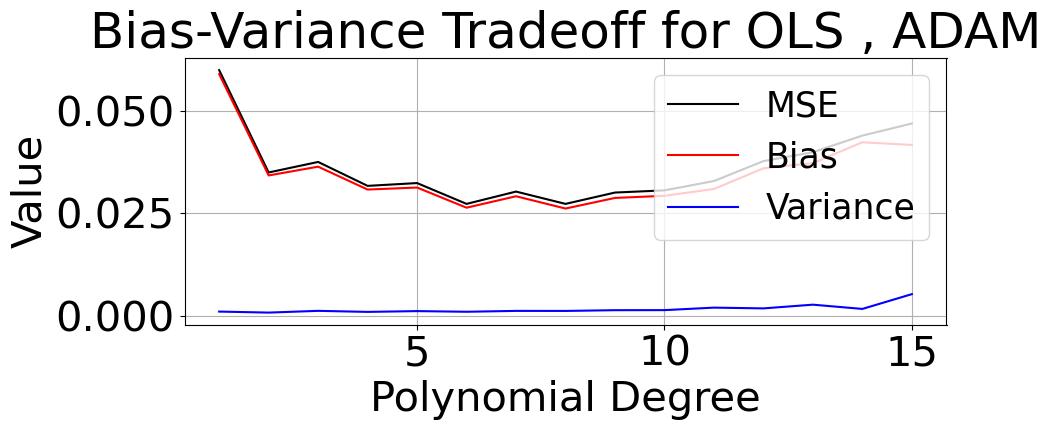

In [34]:
def plot_BVT_degree(x_train,y_train, x_test, y_test, start=1, stop = 15):
    n_boostraps = 100
    mses = []
    mses_hist = []
    bias = []
    variance = []
    polydegree = np.arange(start, stop)

    for degree in polydegree:
        # Initialize predictions array for bootstrap samples
        predictions = np.empty((y_test.shape[0], n_boostraps))
        poly_features = PolynomialFeatures(degree=degree)

        for i in range(n_boostraps):
            X_train_re, y_train_re = resample(x_train, y_train)
            _, _, model, _ = ADAM(X_train_re.reshape(-1,1), y_train_re, degree= degree, lambda_ = 0, n_iter= 300, step_size= 0.01, beta_1=0.9, beta_2=0.999, eps=1e-8, tolerance=1e-5)
        
            # Use the polynomial features for the test data
            x_test_poly = poly_features.fit_transform(x_test)
            predictions[:, i] = (x_test_poly @ model).ravel()  # Flatten to shape (8,)
        
        mses.append(np.mean((y_test.reshape(-1, 1) - predictions) ** 2))
        bias.append(np.mean((y_test.reshape(-1, 1) - np.mean(predictions, axis=1, keepdims=True)) ** 2))
        variance.append(np.mean(np.var(predictions, axis=1, keepdims=True)))
        mses_hist.append([degree, np.mean(mses)])
    # Plotting MSE, Bias, and Variance
    plt.figure(figsize=(10, 5))

    plt.plot(polydegree, mses, label='MSE', color='black')
    plt.plot(polydegree, bias, label='Bias', color='red')
    plt.plot(polydegree, variance, label='Variance', color='blue')

    plt.title('Bias-Variance Tradeoff for OLS , ADAM')
    plt.xlabel('Polynomial Degree')
    plt.ylabel('Value')
    plt.legend()
    plt.grid()


    # Export as a PNG image
    plt.tight_layout()
    plt.savefig(os.path.join('../Fig', 'Bias-Variance_polyn degree.png'))  # Save the combined figure
    plt.show()
    return mses_hist


mses_hist_ADAM = plot_BVT_degree(X_train.reshape(-1,1),y_train_noise, X_test.reshape(-1,1), y_test_noise, 1, 16)
    

In [35]:
def data_set(n):
    np.random.seed(42)
    x = np.random.uniform(-1, 1, n)
    y =  1.0 / (1 + 25 * x**2)+ np.random.normal(0, 0.1, x.shape)
    return x, y

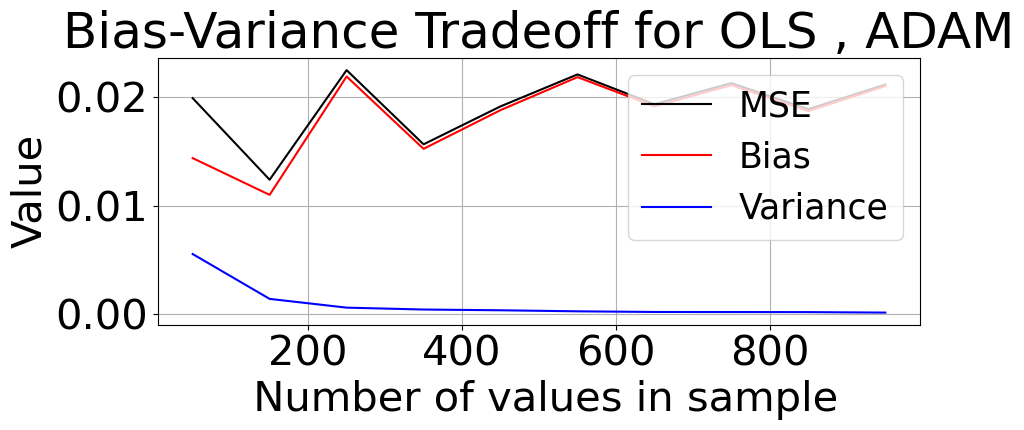

In [36]:
def plot_BVT_number(x, y, start = 20, stop = 1000, step= 50, degree = 7):
    n_boostraps = 100
    mses = []
    bias = []
    variance = []
    n = np.arange(start, stop, step)

    for i in n:
        x, y = data_set(i)
        x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
        x_test = x_test.reshape(-1,1)
        # Initialize predictions array for bootstrap samples
        predictions = np.empty((y_test.shape[0], n_boostraps))
        poly_features = PolynomialFeatures(degree=degree)

        for i in range(n_boostraps):
            X_train_re, y_train_re = resample(x_train, y_train)
            _, _, model, _ = ADAM(X_train_re.reshape(-1,1), y_train_re, degree= degree, lambda_ = 0, n_iter= 500, step_size= 0.1, beta_1=0.9, beta_2=0.999, eps=1e-8, tolerance=1e-5)
            #_, _, model, _ = RMSprop(X_train_re.reshape(-1,1), y_train_re, degree = degree, lambda_ = 0, n_iter=100, step_size = 0.1, decay_rate=0.9, eps=1e-8, tolerance=1e-5)

            # Use the polynomial features for the test data
            x_test_poly = poly_features.fit_transform(x_test)
            predictions[:, i] = (x_test_poly @ model).ravel()  # Flatten to shape (8,)
            
                    
        mses.append(np.mean((y_test.reshape(-1, 1) - predictions) ** 2))
        bias.append(np.mean((y_test.reshape(-1, 1) - np.mean(predictions, axis=1, keepdims=True)) ** 2))
        variance.append(np.mean(np.var(predictions, axis=1, keepdims=True)))

    # Plotting MSE, Bias, and Variance
    plt.figure(figsize=(10, 5))

    plt.plot(n, mses, label='MSE', color='black')
    plt.plot(n, bias, label='Bias', color='red')
    plt.plot(n, variance, label='Variance', color='blue')

    plt.title('Bias-Variance Tradeoff for OLS , ADAM')
    plt.xlabel(' Number of values in sample')
    plt.ylabel('Value')
    plt.legend()
    plt.grid()

    # Export as a PNG image
    plt.tight_layout()
    plt.savefig(os.path.join('../Fig', 'Bias-Variance_number of points.png'))  # Save the combined figure
    plt.show()
    return

plot_BVT_number(x.reshape(-1,1),y_noise, start = 50, stop = 1000, step= 100, degree = 7)

# h) K-fold corss validation

In [37]:
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import RidgeCV, LassoCV
from sklearn.linear_model import Ridge as Ridge_sk
from sklearn.linear_model import Lasso as Lasso_sk

In [38]:
# too long to run_ desided to exclude
def optimal_lambdas(x, y, degree=2):
    
    nlambdas = 20
    lambdas = np.logspace(-3, 3, nlambdas)
    poly = PolynomialFeatures(degree=degree)
    x = poly.fit_transform(x)

    lasso_cv = LassoCV(cv=5,alphas=lambdas, max_iter=1000, tol=1e-5, random_state=42).fit(x, y)
    opt_alp_Lasso = lasso_cv.alpha_
    
    Ridge_cv = RidgeCV(cv=5,alphas=lambdas).fit(x, y)
    opt_alp_Ridge = Ridge_cv.alpha_
    #print(opt_alp_Ridge, opt_alp_Lasso)
    return opt_alp_Ridge, opt_alp_Lasso

In [39]:
def Cross_validation_OLS_R_L(x, y_noise, start = 1, stop=16):
    # store final MSE
    mean_scores_OLS_tot = []
    mean_scores_Ridge_tot = []
    mean_scores_Lasso_tot = []
    degrees_hist = []
    polydegree = np.arange(start, stop)

    for degree in polydegree: 

        kf = KFold(n_splits = 5, shuffle=True, random_state=42)
        poly_features = PolynomialFeatures(degree = degree)

        #store intermediate results
        scores_OLS = []
        scores_Ridge = []
        scores_Lasso = []
        
        for train_index, test_index in kf.split(x):
            X_train, X_test = x[train_index], x[test_index]
            y_train, y_test = y_noise[train_index], y_noise[test_index]
            X_train = poly_features.fit_transform(X_train)
            X_test = poly_features.fit_transform(X_test)

            scaler = StandardScaler()  # Add scaling
            X_train = scaler.fit_transform(X_train)
            X_test = scaler.transform(X_test)
            
            # find optimal lambdas for every degree
            #opt_alp_Ridge, opt_alp_Lasso = optimal_lambdas(X_train, y_train, degree)
            opt_alp_Ridge, opt_alp_Lasso = 0.01, 0.01
            ols_model = LinearRegression()
            ols_model.fit(X_train, y_train)
            y_pred_OLS = ols_model.predict(X_test)
            scores_OLS.append(mean_squared_error(y_test, y_pred_OLS))

            ridge_model = Ridge_sk(alpha=opt_alp_Ridge)
            ridge_model.fit(X_train, y_train)
            y_pred_Ridge = ridge_model.predict(X_test)
            scores_Ridge.append(mean_squared_error(y_test, y_pred_Ridge))

            Lasso_model = Lasso_sk(alpha=opt_alp_Lasso)
            Lasso_model.fit(X_train, y_train)
            y_pred_Lasso = Lasso_model.predict(X_test)
            scores_Lasso.append(mean_squared_error(y_test, y_pred_Lasso))

        mean_scores_OLS_tot.append([np.mean(scores_OLS)])
        mean_scores_Ridge_tot.append([np.mean(scores_Ridge)])
        mean_scores_Lasso_tot.append([np.mean(scores_Lasso)])
        degrees_hist.append([degree])

    return mean_scores_OLS_tot, mean_scores_Ridge_tot, mean_scores_Lasso_tot, degrees_hist


mean_scores_OLS, mean_scores_Ridge, mean_scores_Lasso, degrees = Cross_validation_OLS_R_L(x.reshape(-1,1),y_noise,start = 1, stop=16 )

In [40]:
str_array0 = np.array([f"{x[0]:^10}" for x in degrees])
str_array1 = np.array([f"{x[0]:^10.8f}" for x in mean_scores_OLS])
str_array2 = np.array([f"{x[0]:^10.8f}" for x in mean_scores_Ridge])
str_array3 = np.array([f"{x[0]:<10.8f}" for x in mean_scores_Lasso])
str_array4 = np.array([f"{x[1]:<10.8f}" for x in mses_hist_ADAM])

combined_array = np.column_stack((str_array0,str_array1, str_array2, str_array3, str_array4))
print("MSE:")
print("   n-degree      OLS_sk      Ridge_sk      Lasso_sk       ADAM")
print("-------------------------------------------------------------------")
for row in combined_array:
    print(row)

MSE:
   n-degree      OLS_sk      Ridge_sk      Lasso_sk       ADAM
-------------------------------------------------------------------
['    1     ' '0.08459949' '0.08459946' '0.08440058' '0.05986980']
['    2     ' '0.04787296' '0.04787290' '0.04778525' '0.04738711']
['    3     ' '0.04734407' '0.04734344' '0.04779052' '0.04408232']
['    4     ' '0.02863428' '0.02863299' '0.03354596' '0.04097090']
['    5     ' '0.02822162' '0.02821924' '0.03355053' '0.03924068']
['    6     ' '0.01768704' '0.01767208' '0.03618559' '0.03724079']
['    7     ' '0.01774420' '0.01770792' '0.03618559' '0.03624136']
['    8     ' '0.01289905' '0.01436881' '0.03618551' '0.03511627']
['    9     ' '0.01298990' '0.01440038' '0.03618551' '0.03454867']
['    10    ' '0.01095228' '0.01420723' '0.03618566' '0.03414799']
['    11    ' '0.01128860' '0.01426223' '0.03618566' '0.03402679']
['    12    ' '0.01104757' '0.01446738' '0.03618549' '0.03433049']
['    13    ' '0.01120986' '0.01452438' '0.03618549' '0.0347

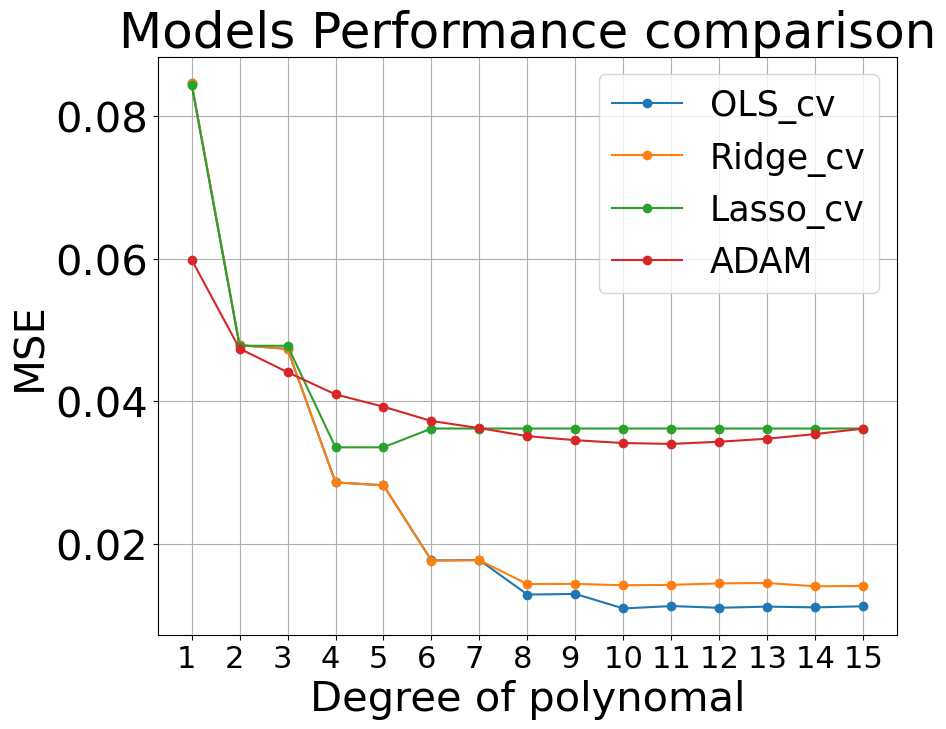

In [41]:
# Plotting
plt.figure(figsize=(10, 8))
plt.plot(str_array0, str_array1.astype(float), marker='o', label='OLS_cv')
plt.plot(str_array0, str_array2.astype(float), marker='o', label='Ridge_cv')
plt.plot(str_array0, str_array3.astype(float), marker='o', label='Lasso_cv')
plt.plot(str_array0, str_array4.astype(float), marker='o', label='ADAM')

# Customizing the plot
plt.title('Models Performance comparison')
plt.xlabel('Degree of polynomal')
plt.ylabel('MSE')
plt.xticks(str_array0,fontsize=22)

plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig(os.path.join('../Fig', 'MSE of dif methods.png'))  # Save the combined figure

# Show the plot
plt.show()
